<a href="https://colab.research.google.com/github/guillealonso/DiplodatosReinforcementLearning/blob/main/Lab_1_intro_rl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1: Introducción al aprendizaje por refuerzos

Curso Aprendizaje por Refuerzos, Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

FaMAF, 2022


Integrantes:

- Alonso, Guillermo
- Ambrosis Nicolás



Código básico de importación y funciones de graficación (no modificar)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import gym

In [ ]:
#@title Código básico de graficación (no modificar)

def plot_reward_per_episode(reward_ep):

    episode_rewards = np.array(reward_ep)

    # se suaviza la curva de convergencia
    episode_number = np.linspace(1, len(episode_rewards) + 1, len(episode_rewards) + 1)
    acumulated_rewards = np.cumsum(episode_rewards)

    reward_per_episode = [acumulated_rewards[i] / episode_number[i] for i in range(len(acumulated_rewards))]
    plt.figure(figsize=(20,8))
    plt.plot(reward_per_episode)
    plt.title('Recompensa acumulada por episodio')
    plt.show()
    
    
def plot_steps_per_episode(timesteps_ep):
    # se muestra la curva de aprendizaje de los pasos por episodio
    episode_steps = np.array(timesteps_ep)
    plt.figure(figsize=(20,8))
    plt.plot(np.array(range(0, len(episode_steps))), episode_steps)
    plt.title('Pasos (timesteps) por episodio')
    plt.show()
    
    
def plot_steps_per_episode_smooth(timesteps_ep):
    episode_steps = np.array(timesteps_ep)

    # se suaviza la curva de aprendizaje
    episode_number = np.linspace(1, len(episode_steps) + 1, len(episode_steps) + 1)
    acumulated_steps = np.cumsum(episode_steps)

    steps_per_episode = [acumulated_steps[i] / episode_number[i] for i in range(len(acumulated_steps))]
    plt.figure(figsize=(20,8))
    plt.plot(steps_per_episode)
    plt.title('Pasos (timesteps) acumulados por episodio')
    plt.show()
    

def draw_value_matrix(q):

    n_rows = 4
    n_columns = 12
    n_actions = 4

    # se procede con los cálculos previos a la graficación de la matriz de valor
    q_value_matrix = np.empty((n_rows, n_columns))
    for row in range(n_rows):
        for column in range(n_columns):

            state_values = []

            for action in range(n_actions):
                state_values.append(q.get((row * n_columns + column, action), -100))

            maximum_value = max(state_values)  # determinamos la acción que arroja máximo valor


            q_value_matrix[row, column] = maximum_value

    # el valor del estado objetivo se asigna en -1 (reward recibido al llegar) para que se coloree de forma apropiada
    q_value_matrix[3, 11] = -1

    # se grafica la matriz de valor
    plt.figure(figsize=(20,8))
    plt.imshow(q_value_matrix, cmap=plt.cm.RdYlGn)
    plt.tight_layout()
    plt.colorbar()

    for row, column in itertools.product(range(q_value_matrix.shape[0]), range(q_value_matrix.shape[1])):

        left_action = q.get((row * n_columns + column, 3), -1000)
        down_action = q.get((row * n_columns + column, 2), -1000)
        right_action = q.get((row * n_columns + column, 1), -1000)
        up_action = q.get((row * n_columns + column, 0), -1000)

        arrow_direction = 'D'
        best_action = down_action

        if best_action < right_action:
            arrow_direction = 'R'
            best_action = right_action
        if best_action < left_action:
            arrow_direction = 'L'
            best_action = left_action
        if best_action < up_action:
            arrow_direction = 'U'
            best_action = up_action
        if best_action == -1:
            arrow_direction = ''

        # notar que column, row están invertidos en orden en la línea de abajo porque representan a x,y del plot
        plt.text(column, row, arrow_direction, horizontalalignment="center")

    plt.xticks([])
    plt.yticks([])
    plt.show()

    print('\n Matriz de mejor acción-valor (en números): \n\n', q_value_matrix)

# Ejemplo 1: The Cliff. 





![](https://github.com/GIDISIA/RLDiplodatos/blob/master/images/cliffwalking.png?raw=1)

donde S= starting point, G= goal

(imagen de Sutton y Barto, 2018)

Descripción del entorno:

Acciones:

* $\uparrow$ - Arriba
* $\downarrow$ - Abajo
* $\rightarrow$ - Derecha
* $\leftarrow$ - Izquierda

Función de recompensa:

* $-1$ en todos los demás estados 
* $-100$ en el acantilado

Nota: caer en el acantilado devuelve al agente al estado inicial en un mismo episodio

Vemos los bloques básicos de nuestro agente

Definimos el método de elección de acciones. En este caso el mismo utiliza la política de exploración $\epsilon$-greedy.

In [ ]:
def choose_action(state):
    """
    Chooses an action according to the learning previously performed 
    using an epsilon-greedy exploration policy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]  # ej: para 4 acciones inicializa en [0,0,0,0]
    max_q = max(q_values)

    if random_state.uniform() < epsilon:  # sorteamos un número: es menor a épsilon?
        return random_state.choice(actions)  # sí: se selecciona una acción aleatoria

    count = q_values.count(max_q)

    
    # hay más de un máximo valor de estado-acción?
    if count > 1:
        # sí: seleccionamos uno de ellos aleatoriamente
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        # no: seleccionamos el máximo valor de estado-acción
        i = q_values.index(max_q)

    return actions[i]

Definimos el esqueleto del método learn, el cuál toma una transición y cambia el dict de los valores de Q de acuerdo a algún algoritmo.

In [ ]:
def learn(state, action, reward, next_state, next_action):
    """
    Performs a SARSA update for a given state transition
    """
    
    # TODO - completa con tu código aquí
    
    predict = q.get((state, action),0.0)
    target = reward + gamma * q.get((next_state, next_action),0.0) 
    q[(state,action)] = predict + alpha*(target-predict)
    
    
    pass

Finalmente, definimos el método principal de iteraciones. 

In [ ]:
def run():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    timesteps_of_episode = []  # registro de la cantidad de pasos que le llevó en cada episodio
    reward_of_episode = []  # cantidad de recompensa que recibió el agente en cada episodio

    for i_episode in range(episodes_to_run):
        # se ejecuta una instancia del agente hasta que el mismo llega a la salida
        # o tarda más de 2000 pasos

        # reinicia el ambiente, obteniendo el estado inicial del mismo
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # elige una acción basado en el estado actual
        action = choose_action(state)
        
        while not done:

            # el agente ejecuta la acción elegida y obtiene los resultados
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(next_state)
            

            episode_reward += reward
            learn(state, action, reward, next_state, next_action)

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                state = next_state
                action = next_action
            else:
                # el algoritmo no ha podido llegar a la meta antes de dar 2000 pasos
                done = True  # se establece manualmente la bandera done
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

Definidos los métodos básicos, procedemos a instanciar a nuestro agente.

In [ ]:
# se crea el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos sus híper-parámetros básicos

alpha = 0.5
gamma = 1
epsilon = 0.1
tau = 25

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Ya instanciado, ejecutamos nuestro agente

In [ ]:
avg_steps_per_episode, timesteps_ep, reward_ep = run()

### Análisis de la ejecución del agente

#### Análisis de convergencia

A diferencia de lo que sucede en el aprendizaje supervisado, en el aprendizaje por refuerzos el rendimiento se evalúa por una función específica que es la función de recompensa. En la práctica, la función de recompensa puede ser externa (y provista por el entorno) o bien puede ser una función creada por diseño (a modo de dirigir el agente hacia lo que por diseño se considera mejor, en nuestro ejemplo podría ser con una recompensa de $+1$ cada vez que el agente llega al estado objetivo). Esto se conoce como *reward shaping*, y hay que tener mucho cuidado con los posibles efectos secundarios de su uso.

Como el objetivo de RL es maximizar la recompensa obtenida, es posible utilizar la información sobre la obtención de la recompensas en cada time-step o episodio para evaluar el rendimiento parcial del agente (esto depende mucho de la particularidad de la distribución de la recompensa para el problema tratado).

Para analizar la ejecución del agente, vamos a ver cómo se desempeñó el mismo en dos curvas:

* Recompensa obtenida en cada episodio: nos dirá cuánta recompensa obtuvo el agente sumando cada una de recompensas individuales de cada episodio. Con esta medida podremos tener una noción de cómo se desempeñó esquivando el acantilado y llegando lo antes posible a la meta.

* Pasos transcurridos en cada episodio: indicará cuántos pasos le ha llevado al agente la ejecución del episodio.

Se estila suavizar ambas curvas para apreciar mejor su progresión (aunque a veces suele analizarse la curva de pasos por episodio sin suavizar).

Veamos recompensa por episodio (recordar que en este entorno cada paso otorga una recompensa de $-1$ excepto al caer al acantilado, donde la recompensa es de $-100$)

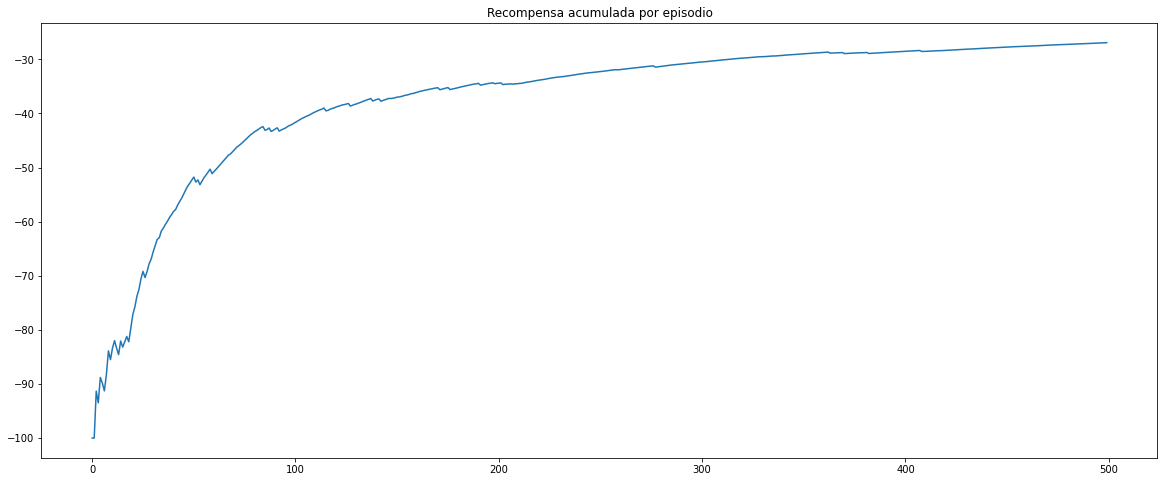

In [ ]:
plot_reward_per_episode(reward_ep)

Veamos pasos por episodio

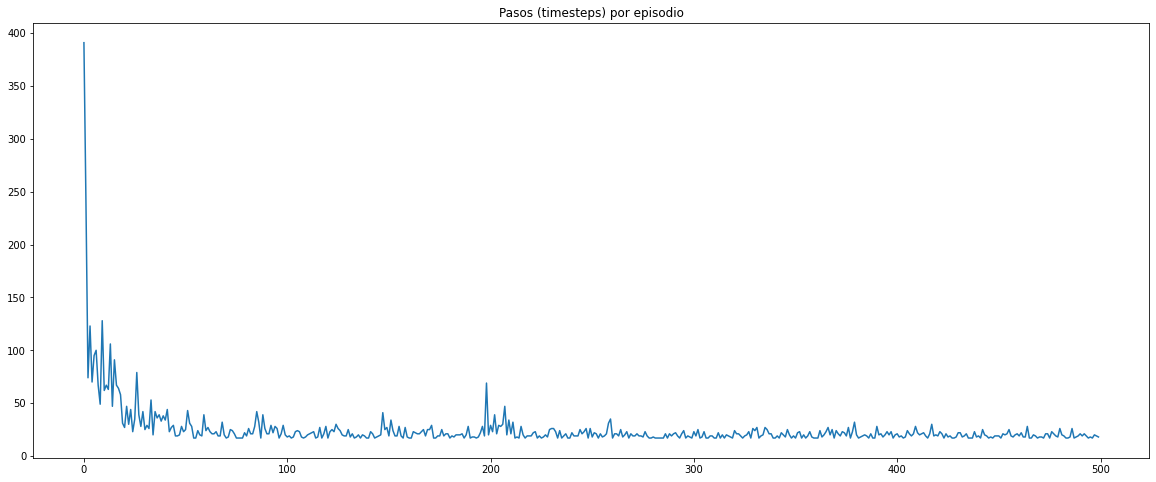

In [ ]:
plot_steps_per_episode(timesteps_ep)

Suavizando...

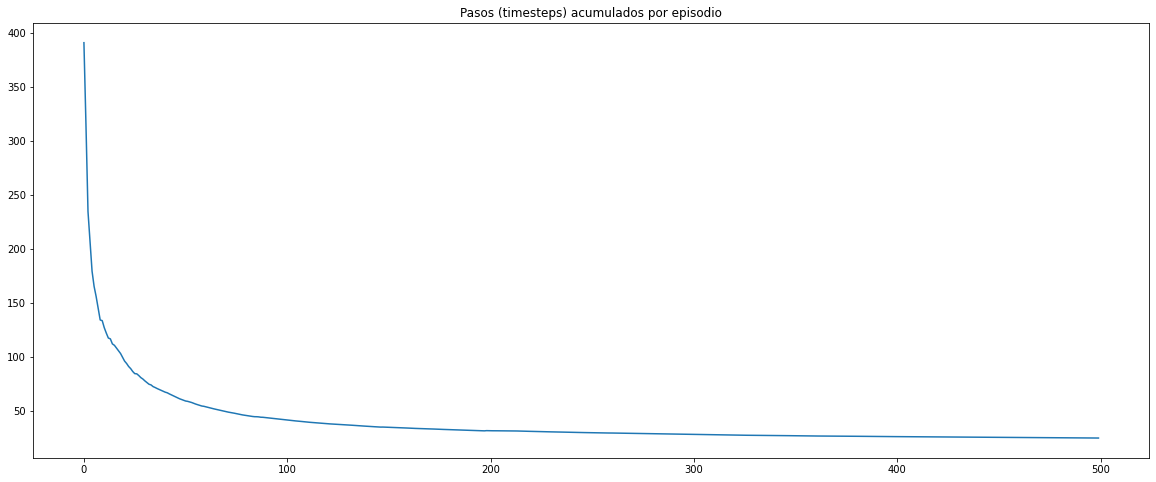

In [ ]:
plot_steps_per_episode_smooth(timesteps_ep)

#### Análisis de matriz de acción-valor y política óptima

Siendo que este es un ejemplo tabular y de pocos estados / acciones, es posible realizar un análisis de convergencia desde otro punto de vista: desde el valor de la función $Q(s,a)$ para la mejor acción de cada estado, al finalizar el entrenamiento del agente, (sería la acción que el agente ejecutaría en cada estado bajo una política *greedy*). Ambos nos brindarán información sobre la convergencia alcanzada por el agente.

Tener en cuenta que este análisis se hace principalmente con fines educativos, para entornos más complejos el mismo puede no ser factible. En tales casos, un análisis alternativo podría consistir en hacer que el agente ejecute su política para la que fue entrenado, para hacer una evaluación a partir del comportamiento del mismo (esto último sería el *test de la política*, frente al *entrenamiento de la política* previo).

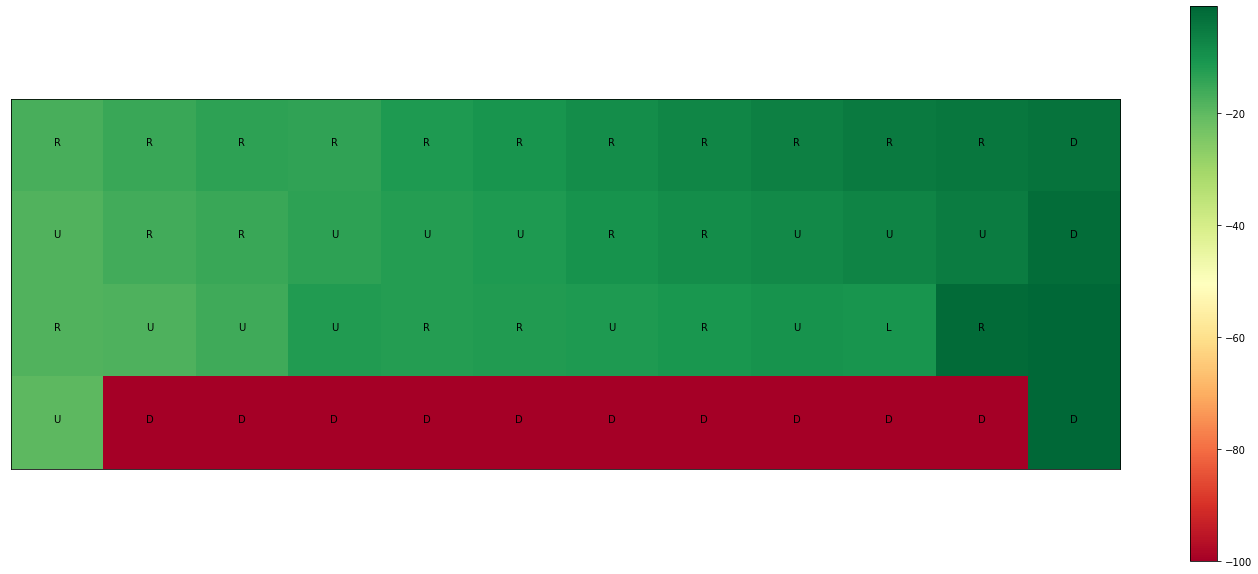


 Matriz de mejor acción-valor (en números): 

 [[ -17.23954428  -15.14316652  -13.47940719  -13.86734791  -11.50591433
   -10.42824021   -8.92910114   -7.36906975   -6.09772006   -5.02260286
    -4.246717     -3.48743802]
 [ -18.17688817  -16.29163152  -15.09887514  -13.57191616  -12.57200446
   -11.46204211  -10.28051994   -8.75636874   -8.02140089   -7.17268501
    -5.41325753   -2.24362335]
 [ -18.16818774  -17.96726471  -16.02741607  -12.12753358  -12.36502775
   -11.94064567  -11.56233996  -10.96253903   -9.96154144  -10.28531687
    -2.00258599   -1.        ]
 [ -19.72790699 -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


In [ ]:
draw_value_matrix(q)

In [ ]:
env.close()

# Actividades

1. Implementar y ejecutar el algoritmo SARSA en "The Cliff".

2. Implementar y ejecutar el algoritmo Q-Learning en "The Cliff". ¿Cómo converge con respecto a SARSA? ¿A qué se debe? Comentar.

3. Ejecutando con distintos híper-parámetros, realizar una breve descripción sobre cómo afectan a la convergencia los distintos valores de $\alpha$, $\epsilon$ y $\gamma$.

4. (Opcional) Implementar política de exploración Softmax, en donde cada acción tiene una probabilidad $$\pi(a \mid s) = \frac{e^{Q(s,a)/\tau}}{\sum_{\widetilde{a} \in A}e^{Q(s,\widetilde{a})/\tau}}$$

5. (Opcional) Implementar Dyna-Q a partir del algoritmo Q-Learning, incorporando una actualización mediante un modelo. Comentar cómo se desempeña respecto a los demás algoritmos.


Para dejar el lab listo para su corrección, dejar link a repo de Github con un notebook ejecutando el agente en la planilla enviada en Slack.

# **Resolución de actividades**




### **1. Implementar y ejecutar el algoritmo SARSA en "The Cliff".**

In [ ]:
def choose_action(state):
    """
    Chooses an action according to the learning previously performed 
    using an epsilon-greedy exploration policy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]  # ej: para 4 acciones inicializa en [0,0,0,0]
    max_q = max(q_values)

    if random_state.uniform() < epsilon:  # sorteamos un número: es menor a épsilon?
        return random_state.choice(actions)  # sí: se selecciona una acción aleatoria

    count = q_values.count(max_q)

    
    # hay más de un máximo valor de estado-acción?
    if count > 1:
        # sí: seleccionamos uno de ellos aleatoriamente
        best = [i for i in range(len(actions)) if q_values[i] == max_q]
        i = random_state.choice(best)
    else:
        # no: seleccionamos el máximo valor de estado-acción
        i = q_values.index(max_q)

    return actions[i]

In [ ]:
def learnSARSA(state, action, reward, next_state, next_action):
    """
    Performs a SARSA update for a given state transition
    """
    
    # TODO - completa con tu código aquí
    target = reward + gamma * q.get((next_state, next_action),0.0) 
    q[(state,action)] = q.get((state, action),0.0) + alpha*(target-q.get((state, action),0.0))
    pass


In [ ]:
# Creamos el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos sus híper-parámetros básicos

alpha = 0.75
gamma = 1
epsilon = 0.1

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [ ]:
def run():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        action = choose_action(state)
        #action = random_state.choice(actions)
        
        while not done:
            #env.render()

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(state)
            #next_action = random_state.choice(actions)
            
            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learnSARSA(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learnSARSA(state, action, reward, next_state, next_action)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [ ]:
# Ejecutamos el agente
avg_steps_per_episode, timesteps_ep, reward_ep = run()

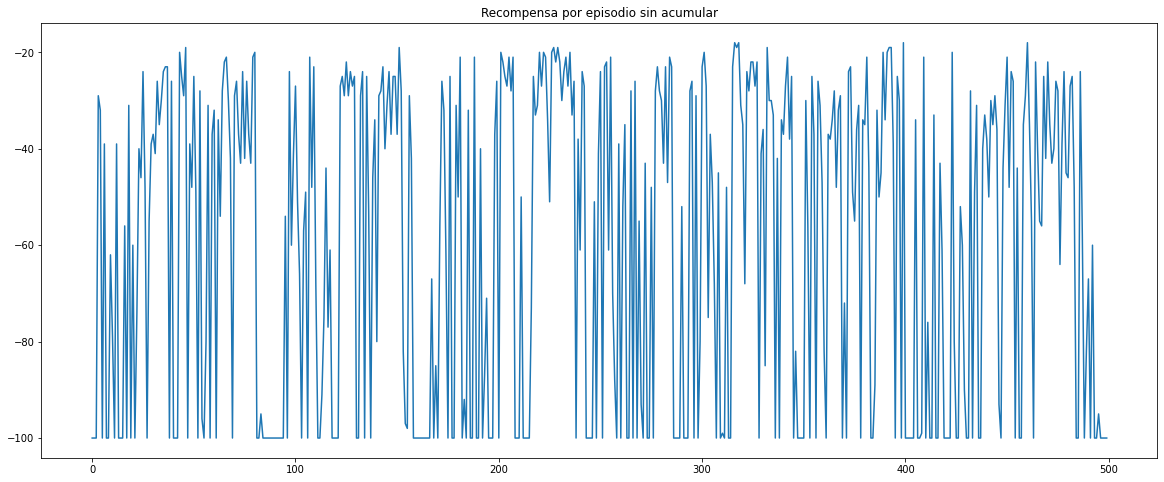

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(reward_ep)
plt.title('Recompensa por episodio sin acumular')
plt.show()

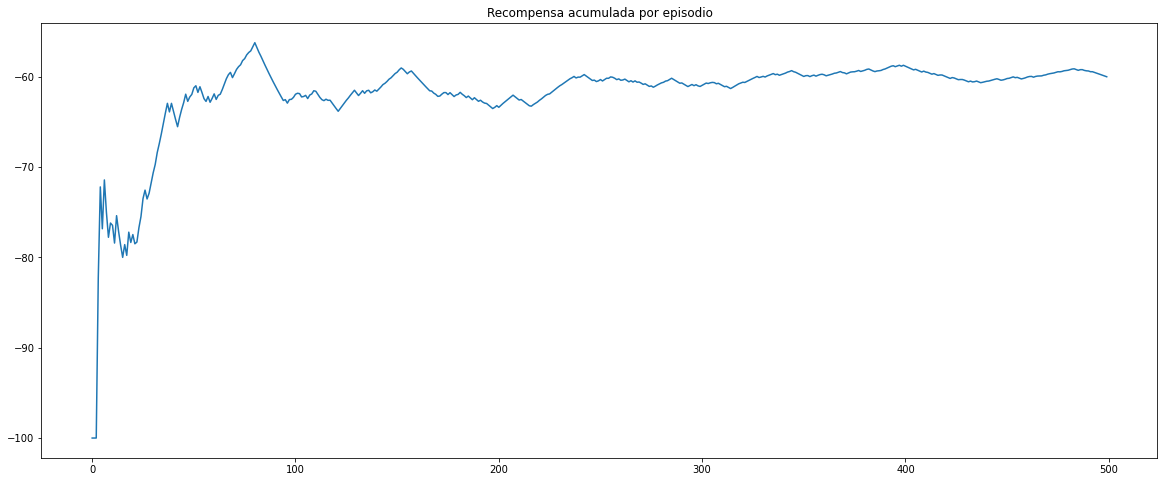

In [ ]:
# Ploteamos el reward a lo largo de los episodios en forma acumulada
plot_reward_per_episode(reward_ep)

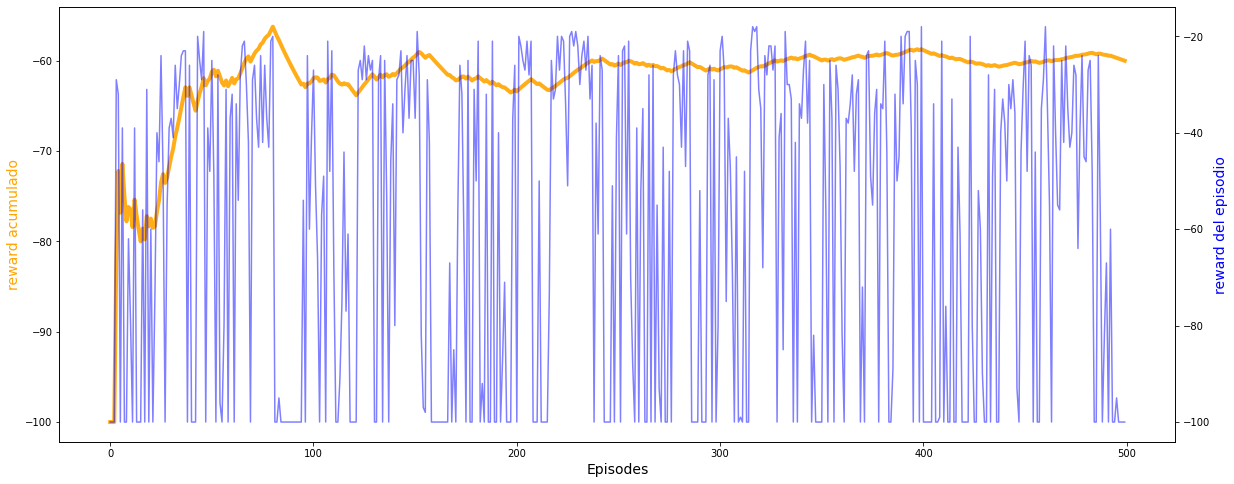

In [ ]:
episode_rewards = np.array(reward_ep)
episode_number = np.linspace(1, len(episode_rewards) + 1, len(episode_rewards) + 1)
acumulated_rewards = np.cumsum(episode_rewards)
reward_per_episode = [acumulated_rewards[i] / episode_number[i] for i in range(len(acumulated_rewards))]


fig, ax1 = plt.subplots(figsize=(20,8))
ax2 = ax1.twinx()
ax1.plot(np.where(reward_ep)[0], reward_per_episode, color='orange', alpha=0.9, linewidth=4)
ax2.plot(np.where(reward_ep)[0], reward_ep, 'b-', alpha=0.5)


ax1.set_xlabel('Episodes', fontsize=14)
ax1.set_ylabel('reward acumulado', color='orange', fontsize=14)
ax2.set_ylabel('reward del episodio', color='b', fontsize=14)

plt.show()

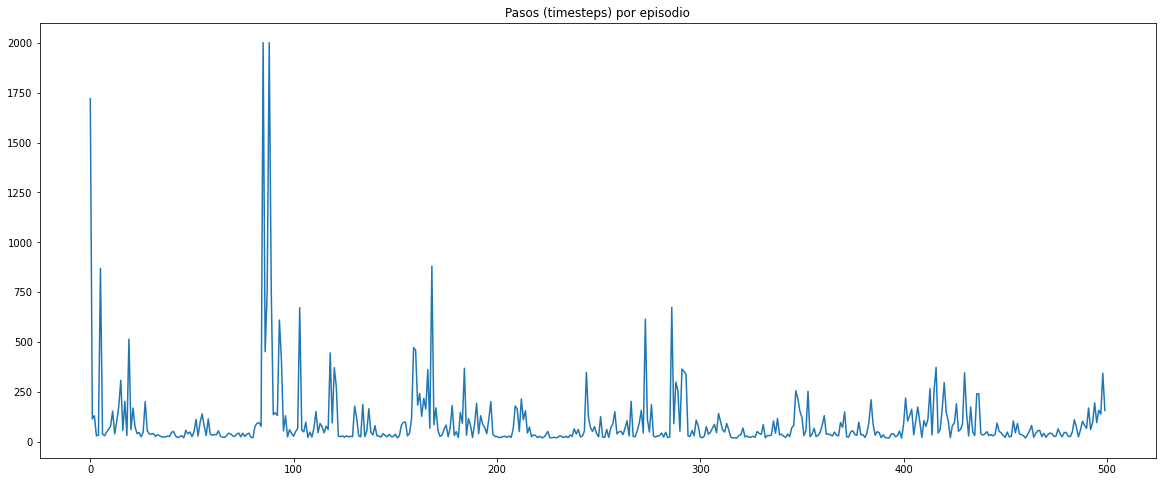

In [ ]:
# Ploteamos el reward para cada episodio
plot_steps_per_episode(timesteps_ep)

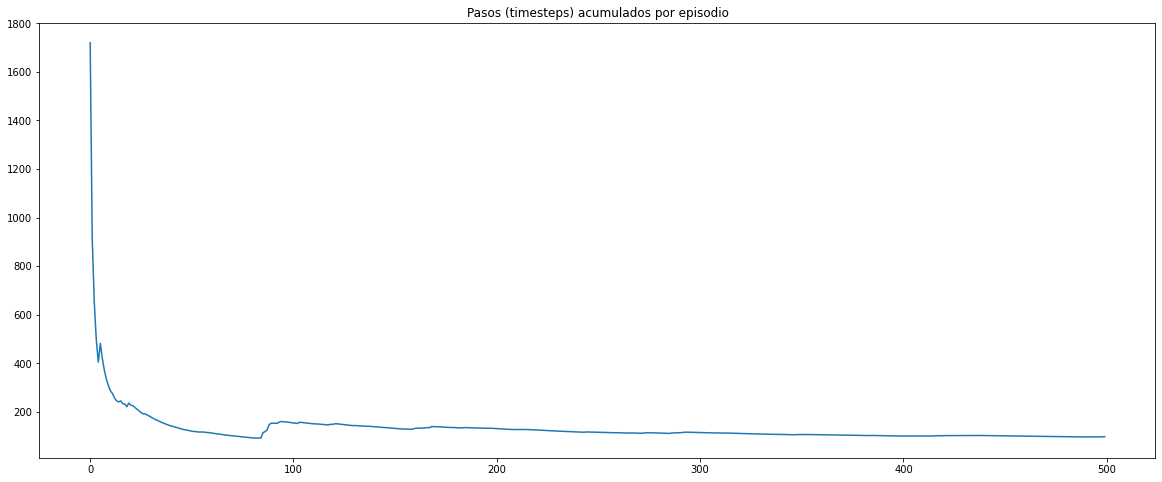

In [ ]:
#Graficamos pasos acumulados por episodio
plot_steps_per_episode_smooth(timesteps_ep)

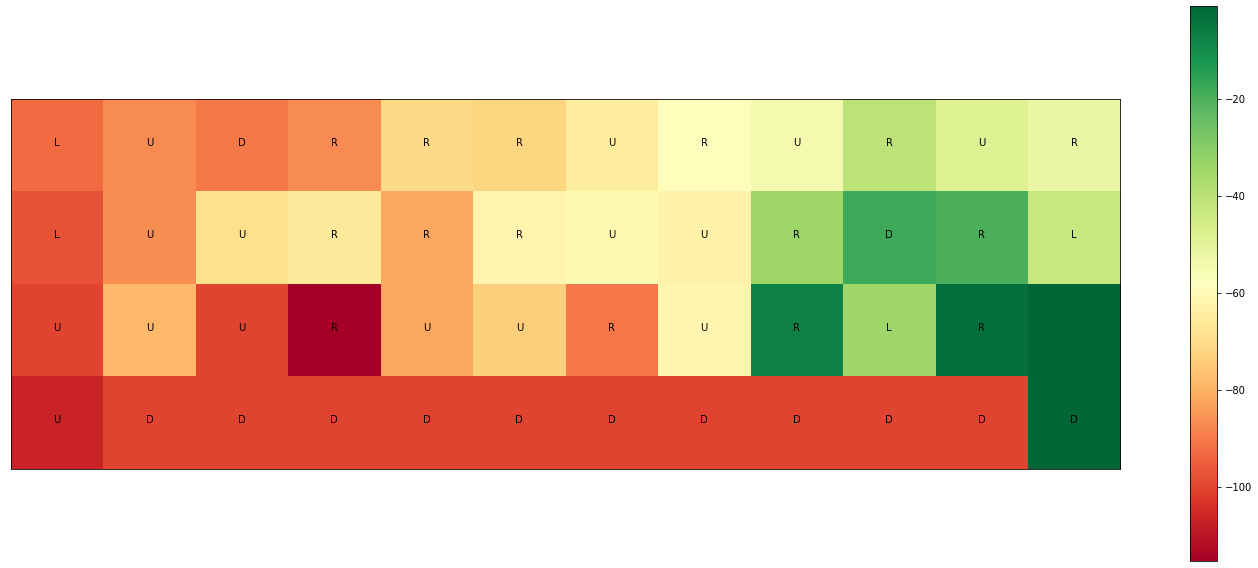


 Matriz de mejor acción-valor (en números): 

 [[ -92.58564676  -87.06305772  -90.22842946  -86.84152743  -71.08513033
   -71.91550908  -65.08002936  -58.66707001  -54.98416343  -40.5894617
   -48.34101425  -51.90845663]
 [ -97.44043507  -86.37131526  -69.1931778   -66.327547    -81.8633866
   -62.05227009  -60.64502274  -62.69038474  -34.00492685  -17.72309397
   -19.79841486  -42.72651131]
 [ -99.81651493  -78.60008142  -99.95379446 -115.31201155  -82.2580731
   -73.6409917   -90.67691679  -61.53603407   -7.49973296  -34.48469114
    -3.0763235    -1.        ]
 [-106.75036392 -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


In [ ]:
#Graficamos matriz de acción-valor
draw_value_matrix(q)


### **2. Implementar y ejecutar el algoritmo Q-Learning en "The Cliff". ¿Cómo converge con respecto a SARSA? ¿A qué se debe? Comentar.**


In [ ]:
def learnQLEARN(state, action, reward, next_state, next_action):
    """
    Q-learm update for a given state transition
    """
    # TODO - completa con tu código aquí
    q_values = [q.get((next_state, a), 0.0) for a in actions]
    max_q = max(q_values)
    target = reward + gamma * max_q #La politica optima de la tabla q para esa accion 
    q[(state,action)] = q.get((state, action),0.0) + alpha * (target-q.get((state, action),0.0))
    pass

In [ ]:
# Creamos el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos sus híper-parámetros básicos

alpha = 0.75
gamma = 1
epsilon = 0.1

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)


/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [ ]:
def run():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        action = choose_action(state)
        #action = random_state.choice(actions)
        
        while not done:
            #env.render()

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(state)
            #next_action = random_state.choice(actions)
            
            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learnQLEARN(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learnQLEARN(state, action, reward, next_state, next_action)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [ ]:
# Ejecutamos el agente
avg_steps_per_episode, timesteps_ep, reward_ep = run()

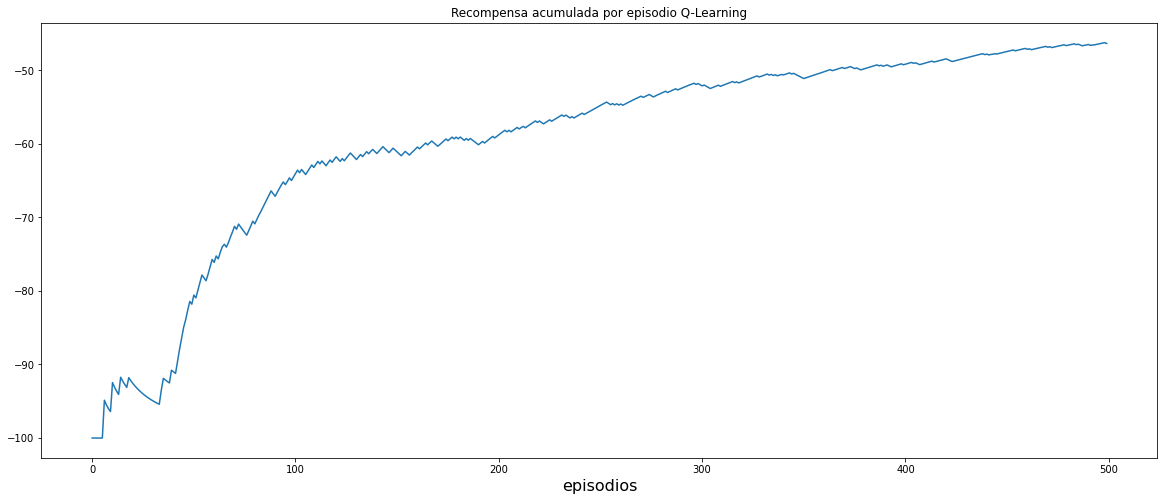

In [ ]:
episode_rewards2 = np.array(reward_ep)

# se suaviza la curva de convergencia
episode_number = np.linspace(1, len(episode_rewards2) + 1, len(episode_rewards2) + 1)
acumulated_rewards = np.cumsum(episode_rewards2)
reward_per_episode2 = [acumulated_rewards[i] / episode_number[i] for i in range(len(acumulated_rewards))]
y2=reward_per_episode2
plt.figure(figsize=(20,8))
plt.plot(y2)
plt.xlabel("episodios", size = 16)
plt.title('Recompensa acumulada por episodio Q-Learning')
plt.show()

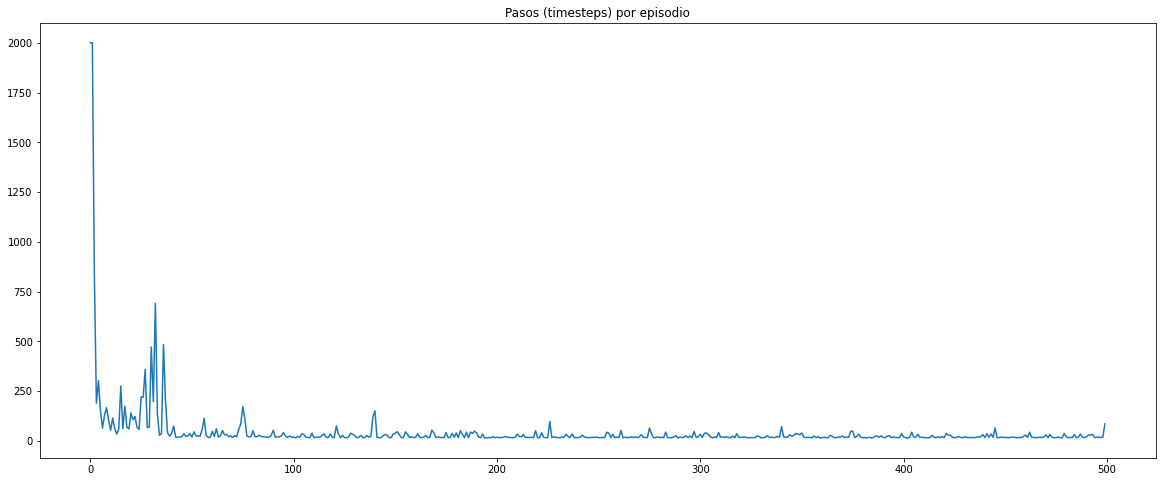

In [ ]:
# Ploteamos el reward para cada episodio
plot_steps_per_episode(timesteps_ep)

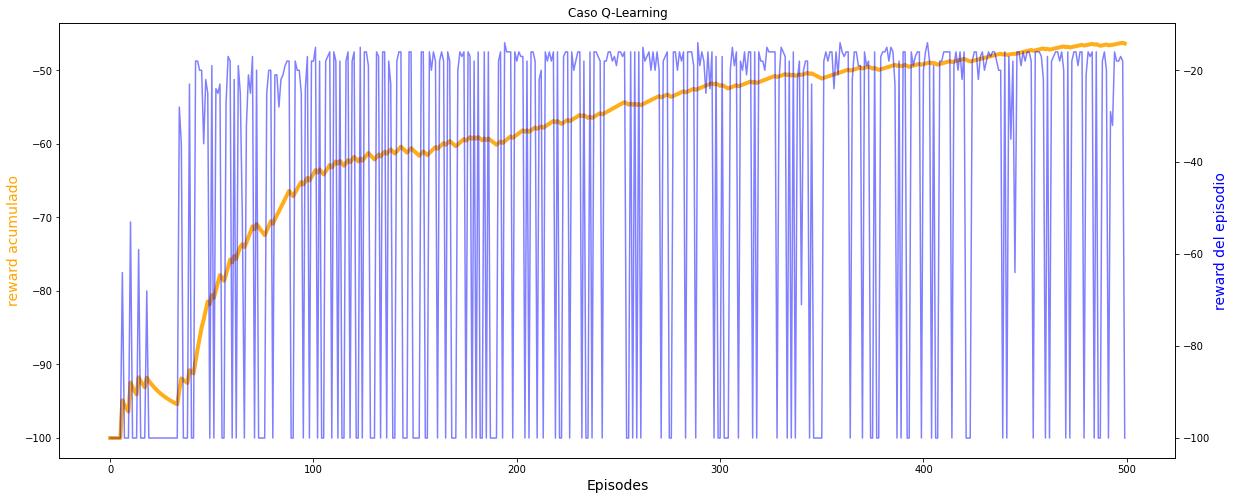

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,8))
ax2 = ax1.twinx()
ax1.plot(np.where(reward_ep)[0], y2, color='orange', alpha=0.9, linewidth=4)
ax2.plot(np.where(reward_ep)[0], reward_ep, 'b-', alpha=0.5)

ax1.set_title('Caso Q-Learning')
ax1.set_xlabel('Episodes', fontsize=14)
ax1.set_ylabel('reward acumulado', color='orange', fontsize=14)
ax2.set_ylabel('reward del episodio', color='b', fontsize=14)

plt.show()

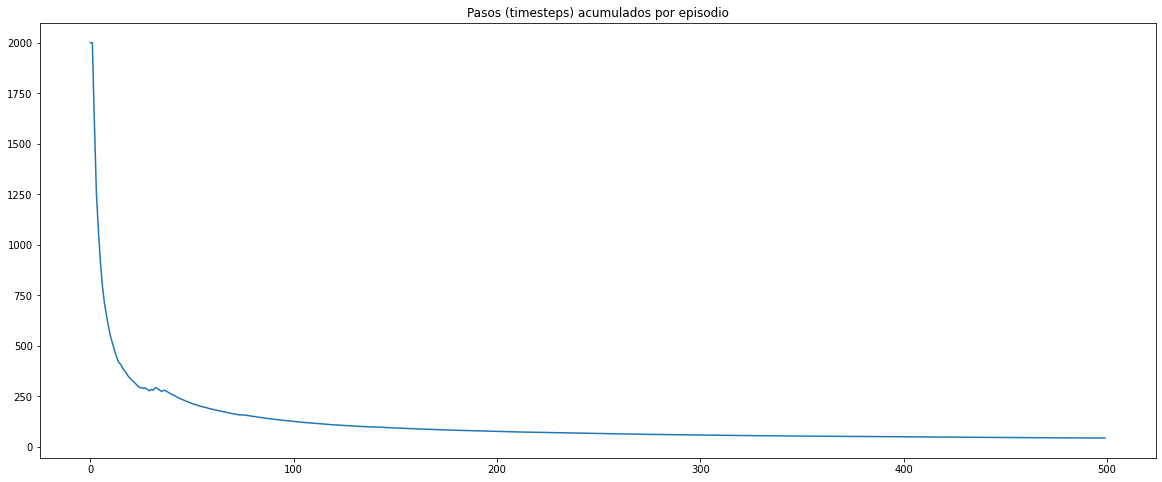

In [ ]:
#Ploteamos pasos acumulados por episodio
plot_steps_per_episode_smooth(timesteps_ep)

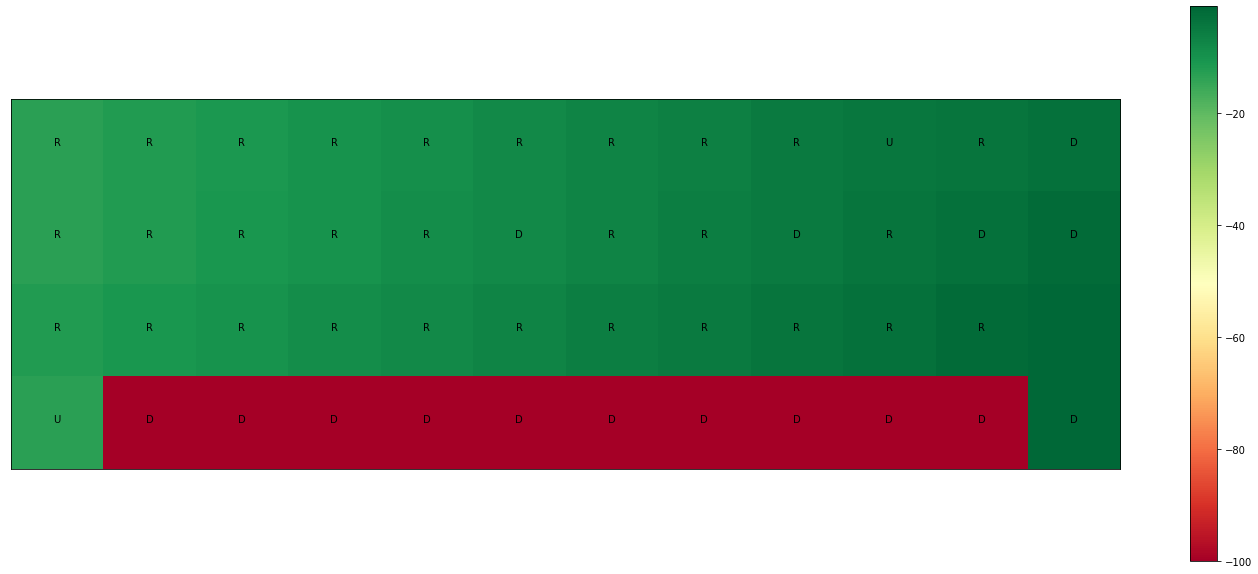


 Matriz de mejor acción-valor (en números): 

 [[ -13.1758515   -12.17852211  -11.17943422  -10.17945761   -9.17945761
    -8.17945761   -7.17945761   -6.17945761   -5.17945761   -4.17945761
    -4.           -3.        ]
 [ -12.99958759  -11.99958759  -10.99958759   -9.99958759   -8.99958759
    -7.99958759   -6.9997358    -5.9997358    -4.9997358    -4.
    -3.           -2.        ]
 [ -12.          -11.          -10.           -9.           -8.
    -7.           -6.           -5.           -4.           -3.
    -2.           -1.        ]
 [ -13.         -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


In [ ]:
#Graficamos matriz acción-valor
draw_value_matrix(q)

### Analizamos la convergencia del algoritmo Q-Learning respecto a SARSA

La siguiente gráfica compara la recompensa obtenida para ambos algoritmos.

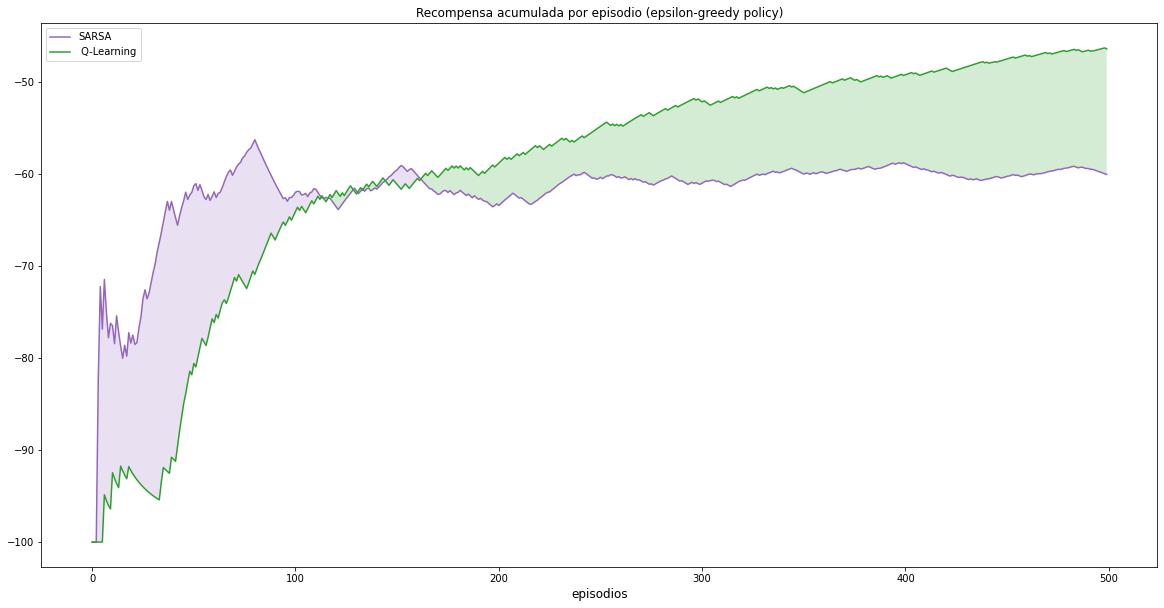

In [ ]:
x = np.where(reward_per_episode)[0]
y1 = reward_per_episode
y2_ = reward_per_episode2
y2_ = np.ma.masked_greater(y2, 1.0)
fig = plt.figure(figsize=(20,10))
fig.clf()
ax = fig.subplots(1,1)
ax.plot(y1, color = 'tab:purple', label="SARSA")
ax.plot(y2_, color = 'tab:green', label=" Q-Learning")
#ax.fill_between(np.where(reward_per_episode)[0], reward_per_episode, reward_per_episode2)
ax.fill_between(x, y1, y2_, where=y2_ >= y1, facecolor='tab:green', interpolate=True, alpha=0.2)
ax.fill_between(x, y1, y2_, where=y2_ <= y1, facecolor='tab:purple', interpolate=True, alpha=0.2)
ax.legend(loc = 'upper left')
plt.title('Recompensa acumulada por episodio (epsilon-greedy policy)')
plt.xlabel("episodios", size = 12)
plt.show()


Podemos observar que el agente del algoritmo Q-Learning inicia con menos recompenzas pero a medida que avanzan los episodios progresivamente acumula mayores valores que SARSA.

Esto se debe a que Q-Learning elige la acción con el criterio de obtener maximo valor en todo momento sin seguir ninguna política (off-policy). Lo cual hace que inicialmente obtenga menores recompenzas que SARSA pero a la larga termina en una mejor convergencia. SARSA al respetar el criterio de la política en la elección de las acciones a ejecutar tiene mejores resultados inicialmente pero luego en un momento converge a recompenzas menores en este caso para la pulítica utilizada con los valores de hiperparametros usados en el ejemplo.


### **3. Ejecutando con distintos híper-parámetros, realizar una breve descripción sobre cómo afectan a la convergencia los distintos valores de $\alpha$, $\epsilon$ y $\gamma$**


### Definimos nuevos híper-parámetros para evaluar sus resultados con el algoritmo SARSA



a.   Variación de $\epsilon$ con SARSA

b.   Variación de $\gamma$ con SARSA

c.   Variación de $\alpha$ con SARSA



#### **a. Epsilon $\epsilon$** con SARSA

In [ ]:
def run():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        action = choose_action(state)
        #action = random_state.choice(actions)
        
        while not done:
            #env.render()

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(state)
            #next_action = random_state.choice(actions)
            
            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learnSARSA(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learnSARSA(state, action, reward, next_state, next_action)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1
            
    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [ ]:
def cum_rew(reward_ep):
  episode_rewards = np.array(reward_ep)
  episode_number = np.linspace(1, len(episode_rewards) + 1, len(episode_rewards) + 1)
  acumulated_rewards = np.cumsum(episode_rewards)
  reward_per_episode = [acumulated_rewards[i] / episode_number[i] for i in range(len(acumulated_rewards))]
  return reward_per_episode

In [ ]:
q = {}
alpha = 0.5 #learning rate
gamma = 1  
epsilon = 0.2 # Inicial 0.1
episodes_to_run = 500
env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)
random_state = np.random.RandomState(42)
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y3 = cum_rew(reward_ep)

q = {}
epsilon = 0.3 # Inicial 0.1
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y4 = cum_rew(reward_ep)

q = {}
epsilon = 0.5 # Inicial 0.1
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y5 = cum_rew(reward_ep)

q = {}
epsilon = 0.8 # Inicial 0.1
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y6 = cum_rew(reward_ep)

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


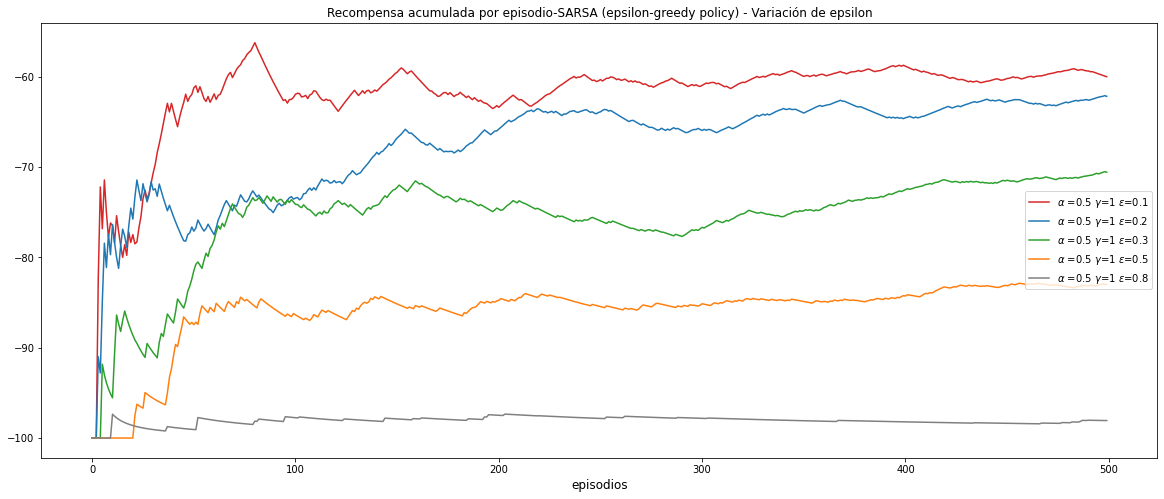

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.subplots(1,1)
ax.plot(y1, color = 'tab:red', label=r'$\alpha$ =0.5 $\gamma$=1 $\epsilon$=0.1')
ax.plot(y3, color = 'tab:blue', label=r'$\alpha$ =0.5 $\gamma$=1 $\epsilon$=0.2')
ax.plot(y4, color = 'tab:green', label=r'$\alpha$ =0.5 $\gamma$=1 $\epsilon$=0.3')
ax.plot(y5, color = 'tab:orange', label=r'$\alpha$ =0.5 $\gamma$=1 $\epsilon$=0.5')
ax.plot(y6, color = 'tab:gray', label=r'$\alpha$ =0.5 $\gamma$=1 $\epsilon$=0.8')
ax.legend(loc = 'right')
plt.title('Recompensa acumulada por episodio-SARSA (epsilon-greedy policy) - Variación de epsilon')
plt.xlabel("episodios", size = 12)
plt.show()

#### b. Gamma $\gamma$ en SARSA

In [ ]:
q = {}
alpha = 0.5 
gamma = 0.9 # Antes 1 
epsilon = 0.1 
episodes_to_run = 500
env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)
random_state = np.random.RandomState(42)
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y7 = cum_rew(reward_ep)

q = {}
gamma = 0.8 # Antes 1 
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y8 = cum_rew(reward_ep)

q = {}
gamma = 0.6 # Antes 1 
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y9 = cum_rew(reward_ep)

q = {}
gamma = 0.4 # Antes 1 
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y10 = cum_rew(reward_ep)

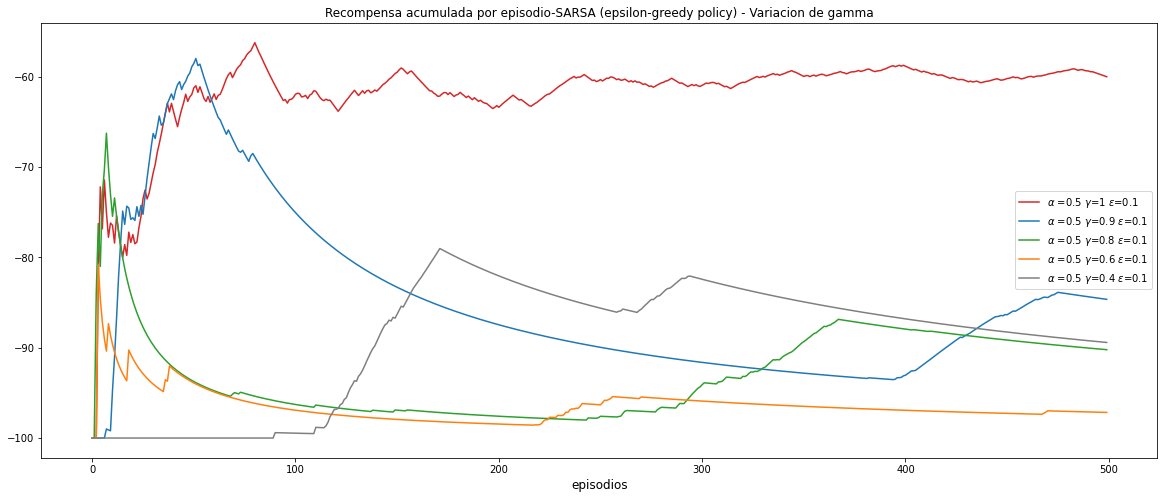

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.subplots(1,1)
ax.plot(y1, color = 'tab:red', label=r'$\alpha$ =0.5 $\gamma$=1 $\epsilon$=0.1')
ax.plot(y7, color = 'tab:blue', label=r'$\alpha$ =0.5 $\gamma$=0.9 $\epsilon$=0.1')
ax.plot(y8, color = 'tab:green', label=r'$\alpha$ =0.5 $\gamma$=0.8 $\epsilon$=0.1')
ax.plot(y9, color = 'tab:orange', label=r'$\alpha$ =0.5 $\gamma$=0.6 $\epsilon$=0.1')
ax.plot(y10, color = 'tab:gray', label=r'$\alpha$ =0.5 $\gamma$=0.4 $\epsilon$=0.1')
ax.legend(loc = 'right')
plt.title('Recompensa acumulada por episodio-SARSA (epsilon-greedy policy) - Variacion de gamma')
plt.xlabel("episodios", size = 12)
plt.show()

#### c. Alfa $\alpha$ en SARSA

In [ ]:
q = {}
alpha = 0.2 #inicial 0.5 
gamma = 1
epsilon = 0.1 
episodes_to_run = 500
env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)
random_state = np.random.RandomState(42)
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y11 = cum_rew(reward_ep)

q = {}
alpha = 0.4 #inicial 0.5
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y12 = cum_rew(reward_ep)


q = {}
alpha = 0.6 #inicial 0.5 
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y13 = cum_rew(reward_ep)

q = {}
alpha = 0.8 #inicial 0.5 
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y14 = cum_rew(reward_ep)


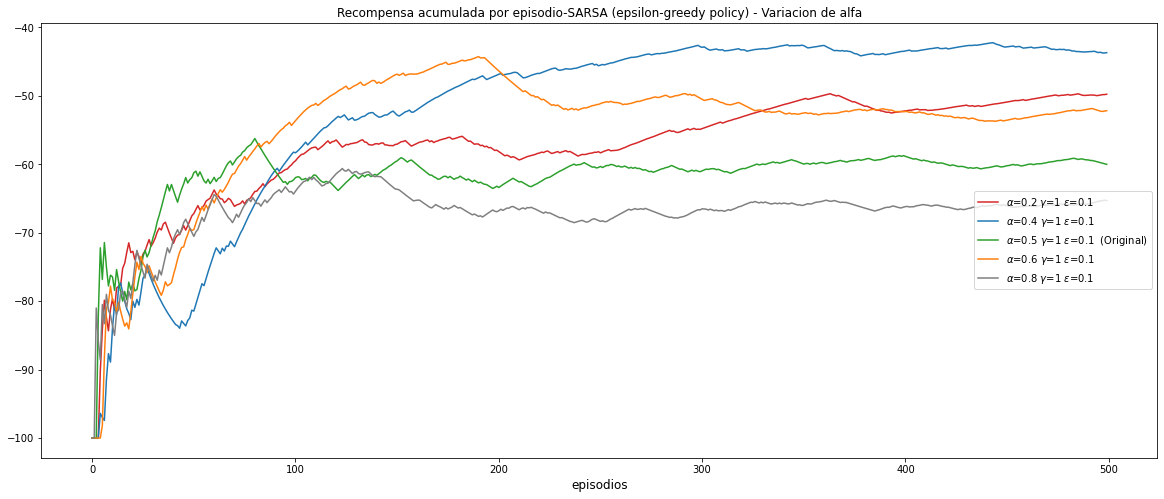

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.subplots(1,1)
ax.plot(y11, color = 'tab:red', label=r'$\alpha$=0.2 $\gamma$=1 $\epsilon$=0.1')
ax.plot(y12, color = 'tab:blue', label=r'$\alpha$=0.4 $\gamma$=1 $\epsilon$=0.1')
ax.plot(y1, color = 'tab:green', label=r'$\alpha$=0.5 $\gamma$=1 $\epsilon$=0.1  (Original)')
ax.plot(y13, color = 'tab:orange', label=r'$\alpha$=0.6 $\gamma$=1 $\epsilon$=0.1')
ax.plot(y14, color = 'tab:gray', label=r'$\alpha$=0.8 $\gamma$=1 $\epsilon$=0.1')
ax.legend(loc = 'right')
plt.title('Recompensa acumulada por episodio-SARSA (epsilon-greedy policy) - Variacion de alfa')
plt.xlabel("episodios", size = 12)
plt.show()

El gáfico verde es el inicial con los parametros el ejemplo, vemos que con alfa = 0.4 mejora el valor y la rapidez de convergencia para SARSA.

### Evaluamos los resultados en algoritmo Q-Learning para los hiperparámetros nuevos

In [ ]:
def run():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        action = choose_action(state)
        #action = random_state.choice(actions)
        
        while not done:
            #env.render()

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            next_action = choose_action(state)
            #next_action = random_state.choice(actions)
            
            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learnQLEARN(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learnQLEARN(state, action, reward, next_state, next_action)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [ ]:
q = {}
alpha = 0.4 # Antes 0.5
gamma = 1 # Antes 1
epsilon = 0.1 # Antes 0.1
episodes_to_run = 500
env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)
random_state = np.random.RandomState(42)
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y15 = cum_rew(reward_ep)

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


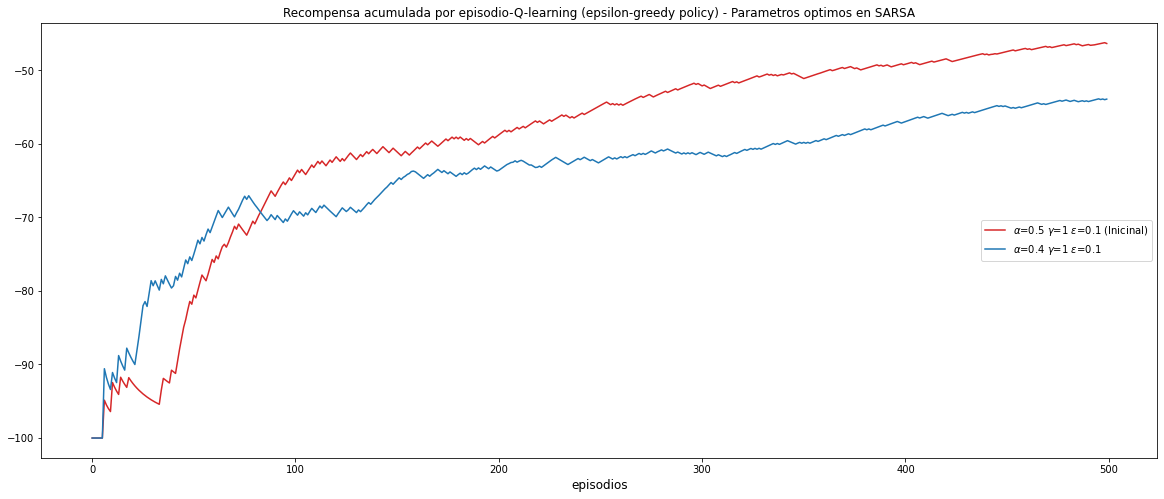

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.subplots(1,1)
ax.plot(y2, color = 'tab:red', label=r'$\alpha$=0.5 $\gamma$=1 $\epsilon$=0.1 (Inicinal)')
ax.plot(y15, color = 'tab:blue', label=r'$\alpha$=0.4 $\gamma$=1 $\epsilon$=0.1')
ax.legend(loc = 'right')
plt.title('Recompensa acumulada por episodio-Q-learning (epsilon-greedy policy) - Parametros optimos en SARSA')
plt.xlabel("episodios", size = 12)
plt.show()

### Definimos nuevos híper-parámetros para evaluar sus resultados en algoritmo Q-Learning



a.   Variación de $\epsilon$ en Q-Learning

b.   Variación de $\gamma$ en Q-Learning

c.   Variación de $\alpha$ en Q-Learning



```
# Esto tiene formato de código
```

#### a.   Variación de $\epsilon$ en Q-Learning

In [ ]:
q = {}
alpha = 0.5 # Antes 0.5, learning rate
gamma = 1 # Antes 1 
epsilon = 0.2 # Antes 0.1
episodes_to_run = 500
env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)
random_state = np.random.RandomState(42)
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y16 = cum_rew(reward_ep)

q = {}
epsilon = 0.3 # Antes 0.1
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y17 = cum_rew(reward_ep)

q = {}
epsilon = 0.5 # Antes 0.1
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y18 = cum_rew(reward_ep)

q = {}
epsilon = 0.8 # Antes 0.1
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y19 = cum_rew(reward_ep)


/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


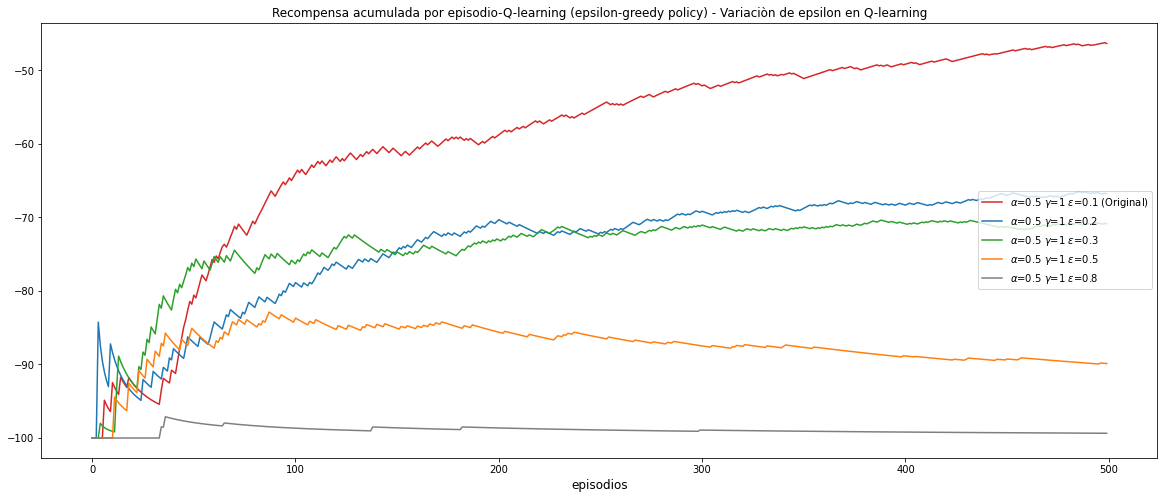

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.subplots(1,1)
ax.plot(y2, color = 'tab:red', label=r'$\alpha$=0.5 $\gamma$=1 $\epsilon$=0.1 (Original)')
ax.plot(y16, color = 'tab:blue', label=r'$\alpha$=0.5 $\gamma$=1 $\epsilon$=0.2')
ax.plot(y17, color = 'tab:green', label=r'$\alpha$=0.5 $\gamma$=1 $\epsilon$=0.3')
ax.plot(y18, color = 'tab:orange', label=r'$\alpha$=0.5 $\gamma$=1 $\epsilon$=0.5')
ax.plot(y19, color = 'tab:gray', label=r'$\alpha$=0.5 $\gamma$=1 $\epsilon$=0.8')
ax.legend(loc = 'right')
plt.title('Recompensa acumulada por episodio-Q-learning (epsilon-greedy policy) - Variaciòn de epsilon en Q-learning')
plt.xlabel("episodios", size = 12)
plt.show()



---



#### b.   Variación de Gama $\gamma$ en Q-Learning

In [ ]:
q = {}
alpha = 0.5 # Antes 0.5, learning rate
gamma = 0.9 # Antes 1 
epsilon = 0.1 # Antes 0.1
episodes_to_run = 500
env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)
random_state = np.random.RandomState(42)
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y20 = cum_rew(reward_ep)

q = {}
gamma = 0.8 # Antes 1 
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y21 = cum_rew(reward_ep)

q = {}
gamma = 0.6 # Antes 1 
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y22 = cum_rew(reward_ep)

q = {}
gamma = 0.4 # Antes 1 
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y23 = cum_rew(reward_ep)

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


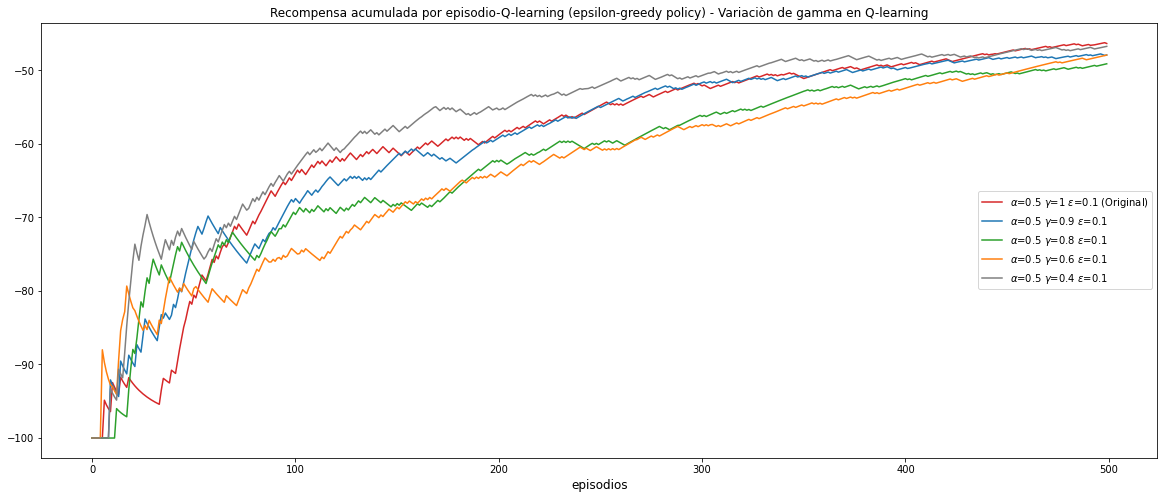

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.subplots(1,1)
ax.plot(y2, color = 'tab:red', label=r'$\alpha$=0.5 $\gamma$=1 $\epsilon$=0.1 (Original)')
ax.plot(y20, color = 'tab:blue', label=r'$\alpha$=0.5 $\gamma$=0.9 $\epsilon$=0.1')
ax.plot(y21, color = 'tab:green', label=r'$\alpha$=0.5 $\gamma$=0.8 $\epsilon$=0.1')
ax.plot(y22, color = 'tab:orange', label=r'$\alpha$=0.5 $\gamma$=0.6 $\epsilon$=0.1')
ax.plot(y23, color = 'tab:gray', label=r'$\alpha$=0.5 $\gamma$=0.4 $\epsilon$=0.1')
ax.legend(loc = 'right')
plt.title('Recompensa acumulada por episodio-Q-learning (epsilon-greedy policy) - Variaciòn de gamma en Q-learning')
plt.xlabel("episodios", size = 12)
plt.show()

#### c.   Variación de Alfa $\alpha$ en Q-Learning

In [ ]:
q = {}
alpha = 0.2 # Antes 0.5, learning rate
gamma = 1 # Antes 1 
epsilon = 0.1 # Antes 0.1
episodes_to_run = 500
env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)
random_state = np.random.RandomState(42)
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y24 = cum_rew(reward_ep)

q = {}
alpha = 0.3 # Antes 0.5, learning rate
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y25 = cum_rew(reward_ep)

q = {}
alpha = 0.6 # Antes 0.5, learning rate
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y26 = cum_rew(reward_ep)

q = {}
alpha = 0.8 # Antes 0.5, learning rate
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y27 = cum_rew(reward_ep)

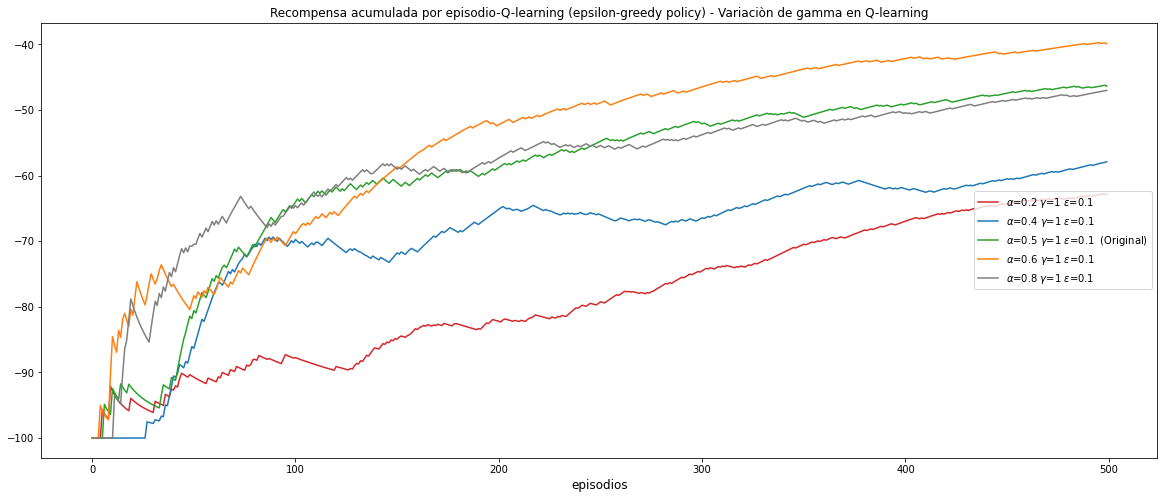

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.subplots(1,1)
ax.plot(y24, color = 'tab:red', label=r'$\alpha$=0.2 $\gamma$=1 $\epsilon$=0.1')
ax.plot(y25, color = 'tab:blue', label=r'$\alpha$=0.4 $\gamma$=1 $\epsilon$=0.1')
ax.plot(y2, color = 'tab:green', label=r'$\alpha$=0.5 $\gamma$=1 $\epsilon$=0.1  (Original)')
ax.plot(y26, color = 'tab:orange', label=r'$\alpha$=0.6 $\gamma$=1 $\epsilon$=0.1')
ax.plot(y27, color = 'tab:gray', label=r'$\alpha$=0.8 $\gamma$=1 $\epsilon$=0.1')
ax.legend(loc = 'right')
plt.title('Recompensa acumulada por episodio-Q-learning (epsilon-greedy policy) - Variaciòn de gamma en Q-learning')
plt.xlabel("episodios", size = 12)
plt.show()

Vemos como mejora la convergencia de Q-Learning con el laernig rate òptimo encontrado

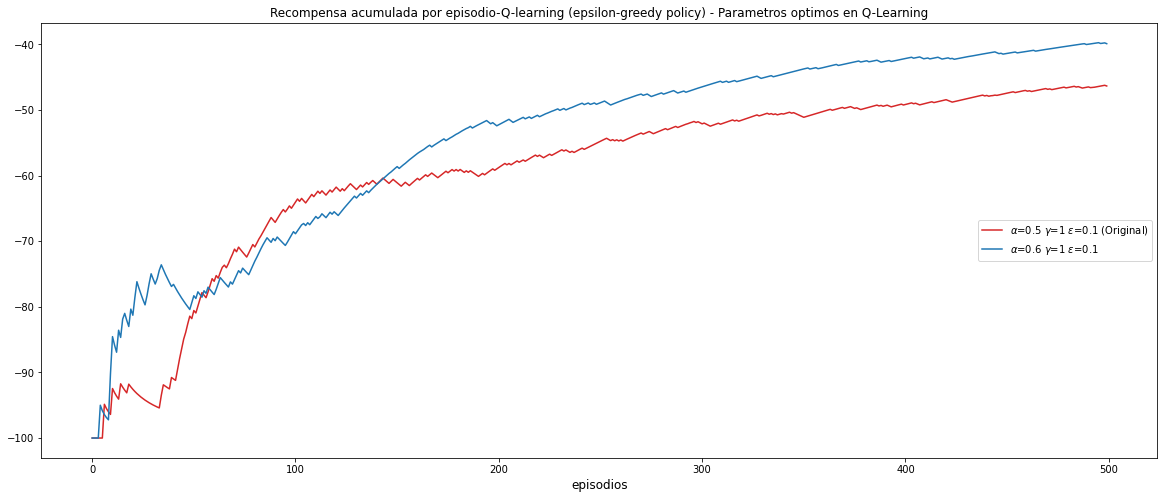

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.subplots(1,1)
ax.plot(y2, color = 'tab:red', label=r'$\alpha$=0.5 $\gamma$=1 $\epsilon$=0.1 (Original)')
ax.plot(y26, color = 'tab:blue', label=r'$\alpha$=0.6 $\gamma$=1 $\epsilon$=0.1')
ax.legend(loc = 'right')
plt.title('Recompensa acumulada por episodio-Q-learning (epsilon-greedy policy) - Parametros optimos en Q-Learning')
plt.xlabel("episodios", size = 12)
plt.show()

### Graficamos nuevamente la comparaciòn entre SARSA y Q-Learning optimizados

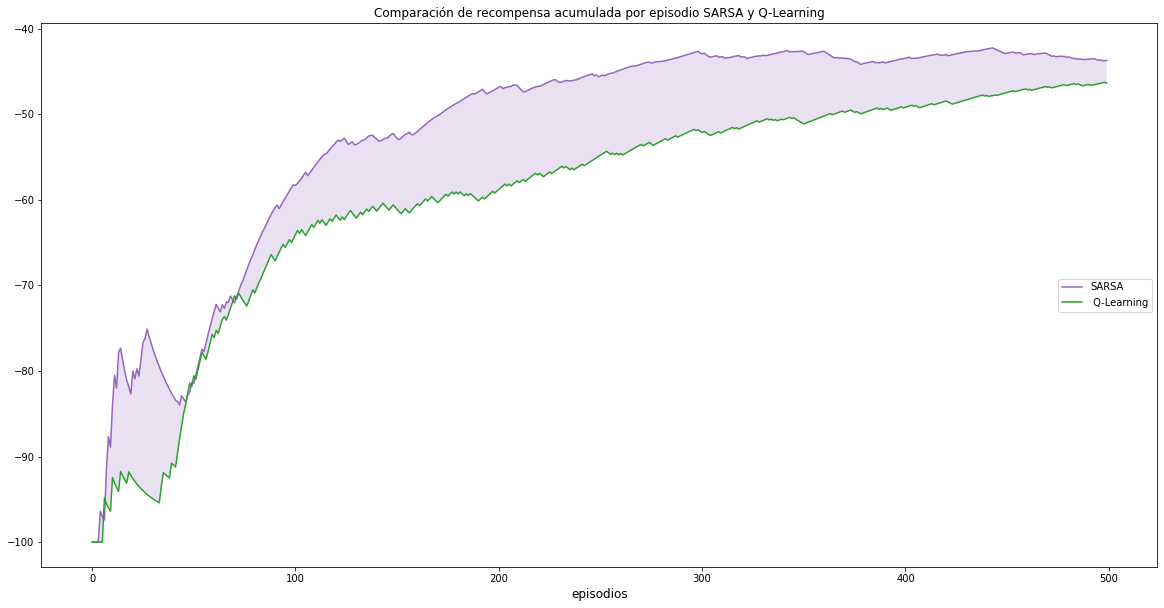

In [ ]:
y1 = y12
y2_ = y26
y2_ = np.ma.masked_greater(y2, 1.0)
fig = plt.figure(figsize=(20,10))
fig.clf()
ax = fig.subplots(1,1)
ax.plot(y1, color = 'tab:purple', label="SARSA")
ax.plot(y2_, color = 'tab:green', label=" Q-Learning")
ax.fill_between(x, y1, y2_, where=y2_ >= y1, facecolor='tab:green', interpolate=True, alpha=0.2)
ax.fill_between(x, y1, y2_, where=y2_ <= y1, facecolor='tab:purple', interpolate=True, alpha=0.2)
ax.legend(loc = 'right')
plt.title('Comparación de recompensa acumulada por episodio SARSA y Q-Learning')
plt.xlabel("episodios", size = 12)
plt.show()

#### Conclusiones

**SARSA**

**exploración/explotación, $\epsilon$:**<br> 
En el caso del agente entrenado mediante el algoritmo SARSA vemos que el mejor valor de exploración/explotación es $\epsilon$ = 0.1 ya que en el número de epidosios analizados es el valor que conduce a una recompensa acumulada mayor. 


**factor de descuento, $\gamma$:**<br>
Se observa un impacto muy fuerte del valor del factor de descuento $\gamma$ en la recompensa acumulada, siendo $\gamma$ = 1 el único valor con resultados aceptables.  Si bien $\gamma$ = 0.5 arroja resultado equivalentes a $\gamma$ = 1 durante los primeros 75 episodios de entrenamiento, a partir de este punto un factor de descuento de 0.75 impacta negativamente en el entrenamiento del agente.


**learning rate, $\alpha$:**<br>
Se observa es que el elentrenamiento puede ser mejorado significativamente al reducir un 20% el learning rate y pasar de su valir original $\alpha$ = 0.5 a $\alpha$ = 0.4.

**Q learning**


En el caso de Q learning, la evalución de hiperparámetros diferentes a los evluados originalmente nos muestra que podemos mejorar el desempeño del agente mediante un aumento en el learning rate, pasando de $\alpha$ = 0.5 a $\alpha$ = 0.6. Los otros dos hiperparámetro analizados no mostraron impactos significactivos sobre el entrenamiento del agente.


**Conclusiones generales**
Tal como motramos en la sección anterior, dados los hiperparámetos originales, el desempeño del agente entrenado mediante el algoritmo Q-learning era mejor que el del agente entrenado mediate SARSA. Luego de realizado un ajuste de hiperparámetros logramos mejorar significativamente el entrenamiento del agente bajo el algoritmo SARSA al punto tal de obtener un despeño mejor que el obtenido para Q learning.

In [ ]:
env.close()

###**4. (Opcional) Implementar política de exploración Softmax, en donde cada acción tiene una probabilidad** $$\pi(a \mid s) = \frac{e^{Q(s,a)/\tau}}{\sum_{\widetilde{a} \in A}e^{Q(s,\widetilde{a})/\tau}}$$

> Bloc con sangría




En la política de exploración Softmax el agente selecciona los movimientos en proporción al conocimiento que tiene en cada momento de su recompensa esperada. Sólo selecciona aquellos movimientos con mayor probabilidad.

In [ ]:
import math
def softmax_choose_action(state):
    """
    Chooses an action according to the learning previously performed 
    using an softmax exploration policy
    """
    q_values = [q.get((state, a), 0.0) for a in actions]
    values_exp = [math.exp(v/tau) for v in q_values]
    
    #while values_exp !=0:
    sum_exp = sum(values_exp)
    if sum_exp==0:
      print(sum_exp)
    
    softmax = [v/sum_exp for v in values_exp]
    #Find the number that is closest to the random generated value
    cum_sum_softmax = np.cumsum(softmax)
    n = random_state.uniform()
    for i in range(len(actions)):
        if cum_sum_softmax[i] >= n:
            action = actions[i]
            break
            
    
    return action
 

###Implementamos la política Sofmax para algoritmo Sarsa

Para este algoritmo utilizamos los parámtros alpha y gama

In [ ]:
def learnSARSA(state, action, reward, next_state, next_action):
    """
    Performs a SARSA update for a given state transition
    """
    
    # TODO - completa con tu código aquí
    target = reward + gamma * q.get((next_state, next_action),0.0) 
    q[(state,action)] = q.get((state, action),0.0) + alpha*(target-q.get((state, action),0.0))
    pass


In [ ]:
# Creamos el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos sus híper-parámetros básicos

alpha = 0.5
gamma = 1
tau = 20

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)


/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [ ]:
#SARSA CON POLITICA SOFTMAX
def run():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        action = softmax_choose_action(state)
        #action = random_state.choice(actions)
        
        while not done:

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            next_action = softmax_choose_action(state)
            #next_action = random_state.choice(actions)
            
            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learnSARSA(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learnSARSA(state, action, reward, next_state, next_action)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [ ]:
# Ejecutamos el agente
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y27=cum_rew(reward_ep)

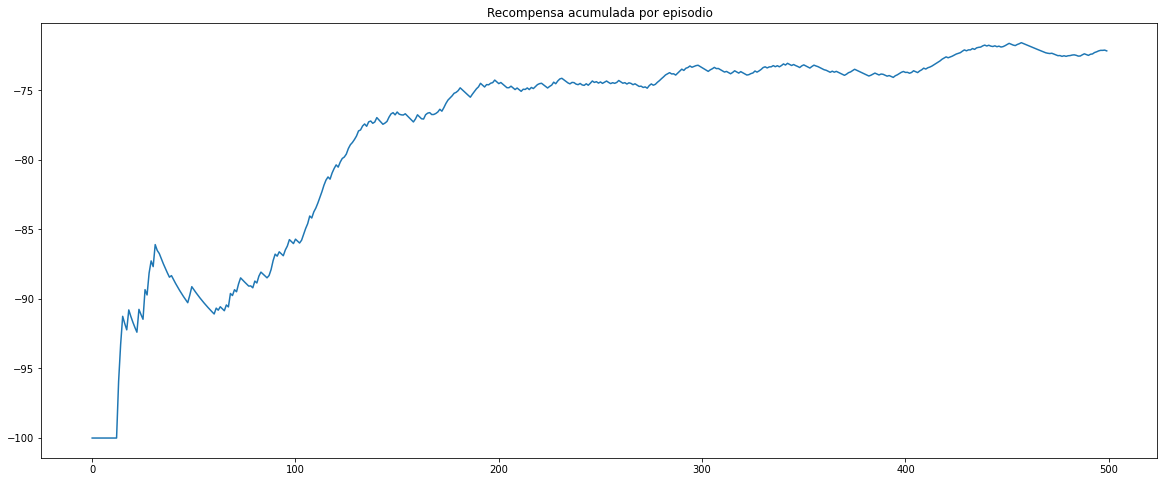

In [ ]:
plot_reward_per_episode(reward_ep)

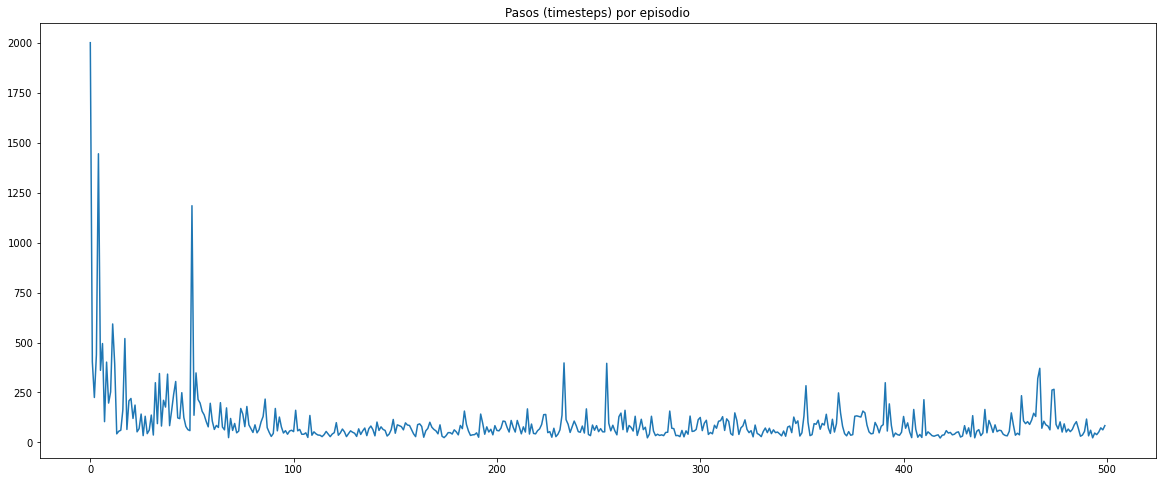

In [ ]:
# Ploteamos el reward para cada episodio
plot_steps_per_episode(timesteps_ep)

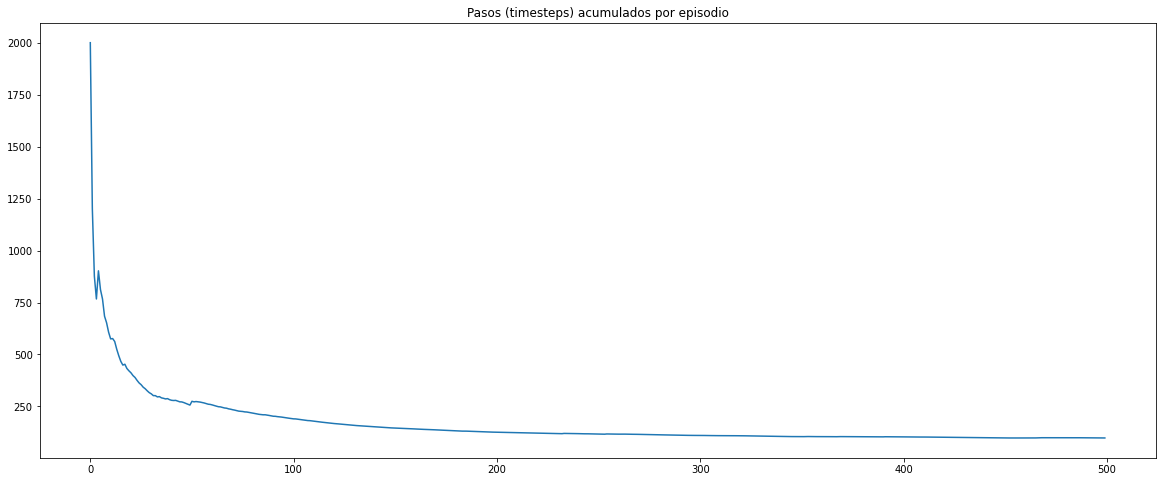

In [ ]:
#Graficamos pasos acumulados por episodio
plot_steps_per_episode_smooth(timesteps_ep)

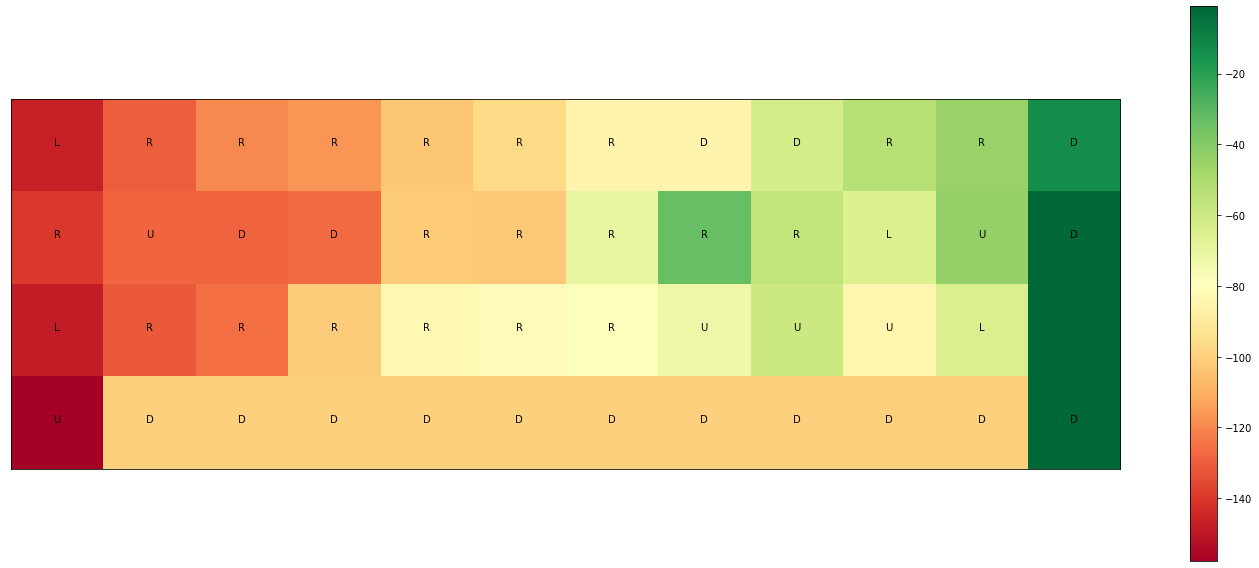


 Matriz de mejor acción-valor (en números): 

 [[-146.95546409 -129.62244592 -119.47405951 -116.16606387 -102.62903053
   -96.48966615  -84.44630177  -84.24903275  -62.34228789  -53.19036732
   -44.52594164  -13.82117526]
 [-139.39601021 -128.26923468 -128.30790971 -126.67568377 -101.40875142
  -102.15238505  -70.54811398  -33.38606526  -56.27257369  -64.73796391
   -43.79629011   -2.20700146]
 [-147.96293356 -130.77686801 -125.37439211 -101.17943339  -82.56482454
   -81.00666252  -78.63753939  -72.08687731  -59.40390654  -83.7846443
   -64.36135641   -1.        ]
 [-157.67513984 -100.         -100.         -100.         -100.
  -100.         -100.         -100.         -100.         -100.
  -100.           -1.        ]]


In [ ]:
#Graficamos matriz acción-valor
draw_value_matrix(q)

###Implementamos la política Sofmax para el algoritmo Q-Learning 

In [ ]:
def learnQLEARN(state, action, reward, next_state, next_action):
    """
    Q-learm update for a given state transition
    """
    # TODO - completa con tu código aquí
    q_values = [q.get((next_state, a), 0.0) for a in actions]
    max_q = max(q_values)
    target = reward + gamma * max_q #La politica optima de la tabla q para esa accion 
    q[(state,action)] = q.get((state, action),0.0) + alpha * (target-q.get((state, action),0.0))
    pass

In [ ]:
# Creamos el diccionario que contendrá los valores de Q para cada tupla (estado, acción)
q = {}

# definimos sus híper-parámetros básicos

alpha = 0.5
gamma = 1 
tau = 20

episodes_to_run = 500

env = gym.make("CliffWalking-v0")
actions = range(env.action_space.n)

# se declara una semilla aleatoria
random_state = np.random.RandomState(42)


/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [ ]:
def run():
    """
    Runs the reinforcement learning agent with a given configuration.
    """
    # list that contains the amount of time-steps of the episode. It is used as a way to score the performance of
    # the agent.
    timesteps_of_episode = []
    # list that contains the amount of reward given to the agent in each episode
    reward_of_episode = []

    for i_episode in range(episodes_to_run):
        # an instance of an episode is run until it fails or until it reaches 200 time-steps

        # resets the environment, obtaining the first state observation
        state = env.reset()

        episode_reward = 0
        done = False
        t = 0

        # Pick an action based on the current state
        action = softmax_choose_action(state)
        #action = random_state.choice(actions)
        
        while not done:

            # Execute the action and get feedback
            next_state, reward, done, info = env.step(action)
            
            next_action = softmax_choose_action(state)
            #next_action = random_state.choice(actions)
            
            episode_reward += reward

            if not done and t < 2000:  # if the algorithm does not converge, it stops after 2000 timesteps
                learnQLEARN(state, action, reward, next_state, next_action)
                state = next_state
                action = next_action
            else:
                done = True  # done is ensured to be True (in the case the algorithm did not reach convergence)
                learnQLEARN(state, action, reward, next_state, next_action)
                timesteps_of_episode = np.append(timesteps_of_episode, [int(t + 1)])
                reward_of_episode = np.append(reward_of_episode, max(episode_reward, -100))

            t += 1

    return reward_of_episode.mean(), timesteps_of_episode, reward_of_episode

In [ ]:
# Ejecutamos el agente
avg_steps_per_episode, timesteps_ep, reward_ep = run()
y28=cum_rew(reward_ep)

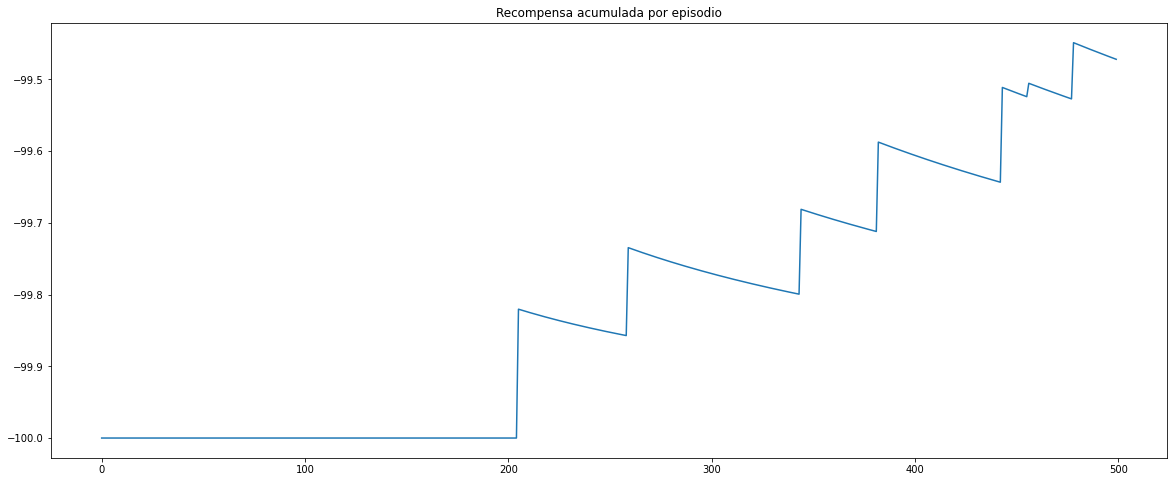

In [ ]:
plot_reward_per_episode(reward_ep)

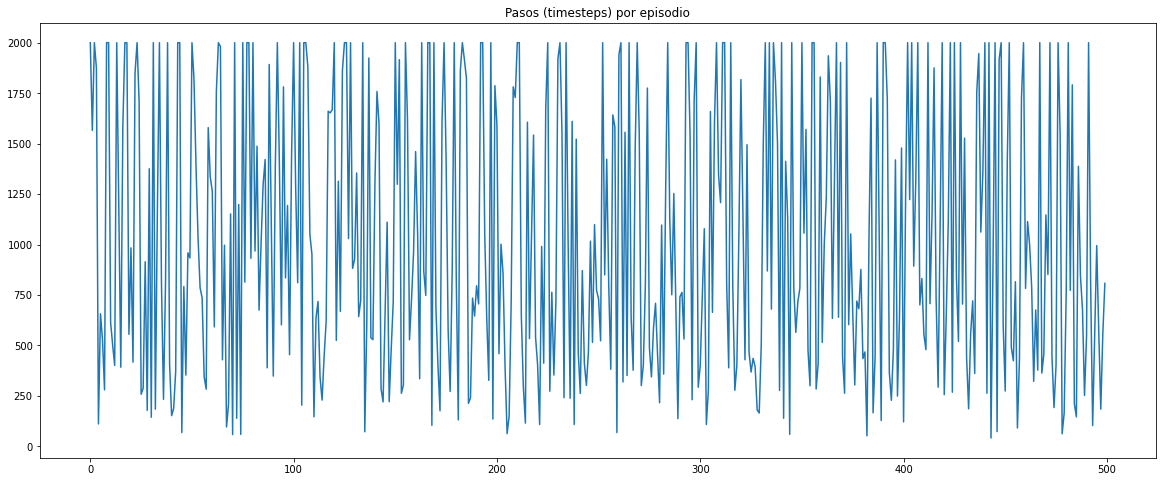

In [ ]:
# Ploteamos el reward para cada episodio
plot_steps_per_episode(timesteps_ep)

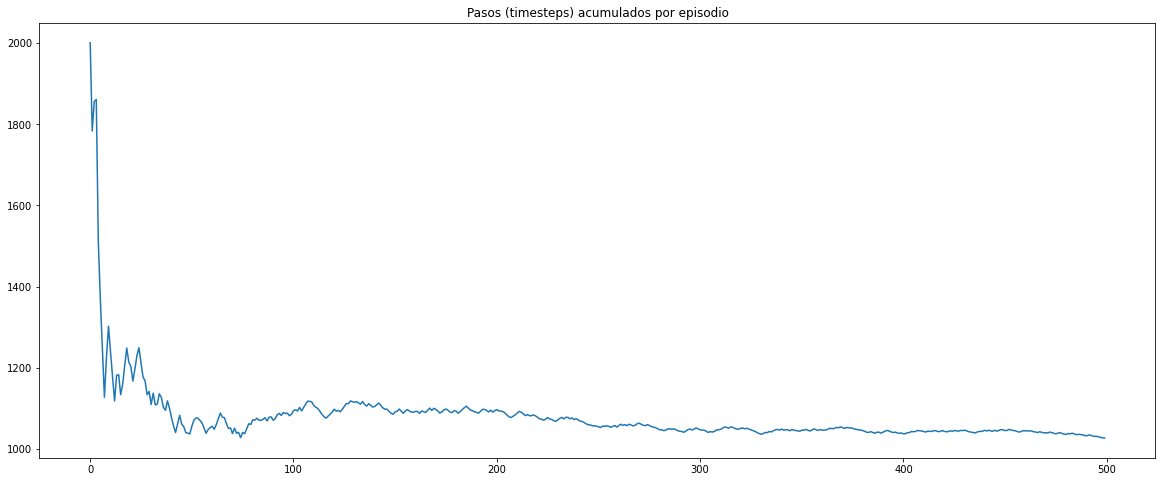

In [ ]:
#Graficamos pasos acumulados por episodio
plot_steps_per_episode_smooth(timesteps_ep)

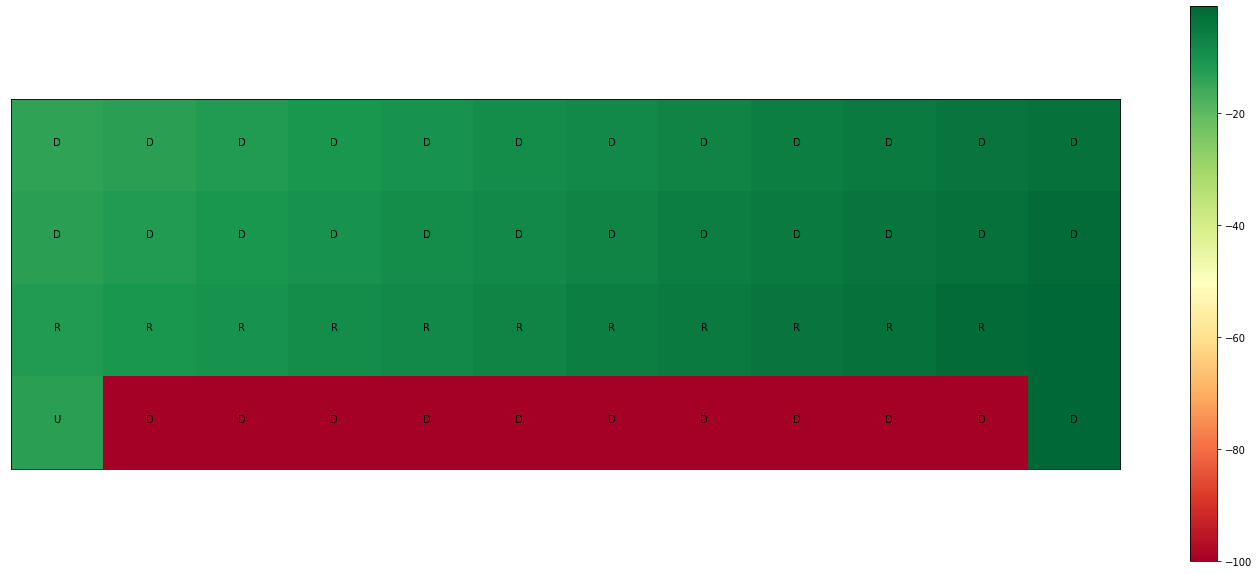


 Matriz de mejor acción-valor (en números): 

 [[ -14.  -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.]
 [ -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.]
 [ -12.  -11.  -10.   -9.   -8.   -7.   -6.   -5.   -4.   -3.   -2.   -1.]
 [ -13. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.   -1.]]


In [ ]:
#Graficamos matriz acción-valor
draw_value_matrix(q)

### **Comparación de recompensas acumuladas para ambos algoritmos con política Softmax**

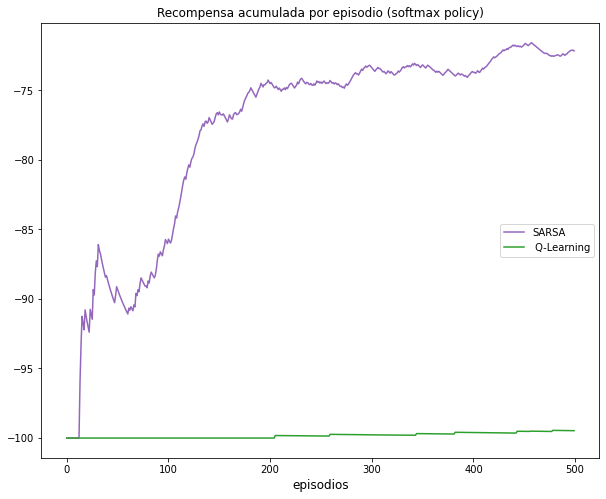

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.subplots(1,1)
ax.plot(y27, color = 'tab:purple', label="SARSA")
ax.plot(y28, color = 'tab:green', label=" Q-Learning")
ax.legend(loc = 'right')
plt.title('Recompensa acumulada por episodio (softmax policy)')
plt.xlabel("episodios", size = 12)
plt.show()


### Conlusión<br>
La figura anterior muetsra la recompensa acumulada para los algoritmos SARSA y Q-Learning aplicando una política Softmax. Se puede observar que mientras la aplicación de esta política trae como resultado un aumneto gradual de la recompensa para el agente entrenado mediante el algoritmo SARSA, no es posible obtener un entrenamiento aceptable para el agente entrenado con el algoritmo Q-Learning, al menos en el número de episodios que venimos analizando (500).

Una hipótesis que podría explicar este resultado es que esto se deba a una exploración insuficiente. El algoritmo tiene una alta probabilidad de elegir la acción que actualmente cree que es la mejor. En consecuencia, si comienza con una suposición inicial deficiente para los valores Q, tomará mucho más tiempo corregir esos valores Q porque explora (es decir, intenta acciones que son subóptimas de acuerdo con las estimaciones actuales para los valores Q) a una tasa más baja y, por lo tanto, converge mucho más lentamente. Una posible solución a este problema podría ser utilizar una tasa de exploración inicial más alta y reducirla a medida que trasncurren los episodios.